# Import Libraries

In [ ]:
!pip install scikit-optimize

In [ ]:
# Import Libraries

import array
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
from matplotlib import rcParams
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron, LogisticRegression, ElasticNet

# Load Dataset main Dataset

In [ ]:
# Load Dataset

sample_data = pd.read_csv("GPSdataset.csv")

print("\n================")
print("  Main Dataset:")
print("================\n")

sample_data


  Main Dataset:



,PRN,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Carrier_Doppler_hz,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Pseudorange_m,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,RX_time,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,TOW_at_current_symbol_s,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,In_phase_component,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Quadrature_component,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Tracking_Loop_Carrier_Doppler_Hz,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,CN0_SNV_dB_Hz,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Output
0,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,...,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,
1,0,0,19,0,0,0,0,0,0,0,-154.1893483,0,0,0,0,0,0,0,2157756.678,0,0,0,0,0,490272.02,490272.02,490272.02,490272.02,490272.02,490272.02,490272.02,490272.02,0,0,490272.0128,0,0,0,0,0,...,0,121300.59,0,0,0,0,0,0,0,110230.56,0,0,0,0,0,0,0,-50626.641,0,0,0,0,0,0,0,-233.86438,0,0,0,0,0,0,0,42.948742,0,0,0,0,0,0
2,0,0,19,0,0,0,0,0,0,0,-150.5996694,0,0,0,0,0,0,0,2157756.946,0,0,0,0,0,490272.04,490272.04,490272.04,490272.04,490272.04,490272.04,490272.04,490272.04,0,0,490272.0328,0,0,0,0,0,...,0,151044.3,0,0,0,0,0,0,0,-150492.94,0,0,0,0,0,0,0,12893.987,0,0,0,0,0,0,0,-227.16675,0,0,0,0,0,0,0,42.968246,0,0,0,0,0,0
3,0,0,19,0,0,0,0,0,0,0,-152.1101553,0,0,0,0,0,0,0,2157757.393,0,0,0,0,0,490272.06,490272.06,490272.06,490272.06,490272.06,490272.06,490272.06,490272.06,0,0,490272.0528,0,0,0,0,0,...,0,158914.5,0,0,0,0,0,0,0,-158322.95,0,0,0,0,0,0,0,-13699.01,0,0,0,0,0,0,0,-223.90443,0,0,0,0,0,0,0,42.962643,0,0,0,0,0,0
4,0,0,19,0,0,0,0,0,0,0,-155.412732,0,0,0,0,0,0,0,2157757.822,0,0,0,0,0,490272.08,490272.08,490272.08,490272.08,490272.08,490272.08,490272.08,490272.08,0,0,490272.0728,0,0,0,0,0,...,0,151298.47,0,0,0,0,0,0,0,-150987.3,0,0,0,0,0,0,0,-9698.707,0,0,0,0,0,0,0,-224.29417,0,0,0,0,0,0,0,42.983204,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,24,0,0,12,0,6,0,19,-1158.66,0,0,3822.66,0,1685.11,0,-374.891,2.87499e+07,0,0,2.72327e+07,0,2.57726e+07,0,2.61622e+07,490650,490650,490650,490650,490650,490650,490650,490650,490650,0,0,490650,0,490650,0,490650,...,0,0,117351,0,168587,0,116621,-90252.2,0,0,-116895,0,-162712,0,116568,-4835.85,0,0,10344.4,0,44118.8,0,-3519.57,-1252.21,0,0,3770.91,0,1713.81,0,-212.947,41.7347,0,0,44.7334,0,45.0986,0,42.1232,1
18896,24,0,0,12,0,6,0,19,-1167.74,0,0,3822.6,0,1684.44,0,-374.953,2.87499e+07,0,0,2.72327e+07,0,2.57725e+07,0,2.61622e+07,490650,490650,490650,490650,490650,490650,490650,490650,490650,0,0,490650,0,490650,0,490650,...,0,0,126926,0,119936,0,121342,88174.9,0,0,126356,0,-116107,0,121341,13136.4,0,0,-12011.8,0,30061.2,0,-523.001,-1250.17,0,0,3771.12,0,1713.84,0,-212.328,41.7167,0,0,44.7684,0,45.1127,0,42.1485,1
18897,24,0,0,12,0,6,0,19,-1157.14,0,0,3821.96,0,1684.55,0,-377.492,2.87499e+07,0,0,2.72327e+07,0,2.57725e+07,0,2.61622e+07,490650,490650,490650,490650,490650,490650,490650,490650,490650,0,0,490650,0,490650,0,490650,...,0,0,114150,0,132458,0,88746.3,-87337.1,0,0,-111480,0,-132236,0,87198.8,-896.11,0,0,-24545

# Create Sub Datasets from main Dataset

In [ ]:
# Sub Dataset

ch0 = pd.DataFrame()
ch1 = pd.DataFrame()
ch2 = pd.DataFrame()
ch3 = pd.DataFrame()
ch4 = pd.DataFrame()
ch5 = pd.DataFrame()
ch6 = pd.DataFrame()
ch7 = pd.DataFrame()

columns = sample_data.columns

for i in range(13):
    ch0[columns[i*8]] = sample_data[sample_data.columns[i*8+0]]
    
for i in range(13):
    ch1[columns[i*8]] = sample_data[sample_data.columns[i*8+1]]

for i in range(13):
    ch2[columns[i*8]] = sample_data[sample_data.columns[i*8+2]]

for i in range(13):
    ch3[columns[i*8]] = sample_data[sample_data.columns[i*8+3]]

for i in range(13):
    ch4[columns[i*8]] = sample_data[sample_data.columns[i*8+4]]
    
for i in range(13):
    ch5[columns[i*8]] = sample_data[sample_data.columns[i*8+5]]
    
for i in range(13):
    ch6[columns[i*8]] = sample_data[sample_data.columns[i*8+6]]
    
for i in range(13):
    ch7[columns[i*8]] = sample_data[sample_data.columns[i*8+7]]
    
ch0['Output'] = sample_data['Output']
ch1['Output'] = sample_data['Output']
ch2['Output'] = sample_data['Output']
ch3['Output'] = sample_data['Output']
ch4['Output'] = sample_data['Output']
ch5['Output'] = sample_data['Output']
ch6['Output'] = sample_data['Output']
ch7['Output'] = sample_data['Output']

In [ ]:
# Ch0 Dataset

print("\n================")
print("  CH-0 Dataset:")
print("================\n")

ch0


  CH-0 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,ch0,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,24,-1158.66,2.87499e+07,490650,490650,200198,85946.6,90983,90381.7,-90252.2,-4835.85,-1252.21,41.7347,1
18896,24,-1167.74,2.87499e+07,490650,490650,200221,76573.7,90847.1,89148.1,88174.9,13136.4,-1250.17,41.7167,1
18897,24,-1157.14,2.87499e+07,490650,490650,200244,93504.8,88210.2,87341.7,-87337.1,-896.11,-1252.56,41.6208,1
18898,24,-1154.82,2.875e+07,490650,490650,200267,47092.4,54343.1,58810.7,57497,12361.3,-1248.08,41.6005,1


In [ ]:
# Ch1 Dataset

print("\n================")
print("  CH-1 Dataset:")
print("================\n")

ch1


  CH-1 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,ch1,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18896,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18897,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18898,0,0,0,490650,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Ch2 Dataset

print("\n================")
print("  CH-2 Dataset:")
print("================\n")

ch2


  CH-2 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,ch2,
1,19,-154.1893483,2157756.678,490272.02,490272.0128,6887.893845,86853.195,126237.51,121300.59,110230.56,-50626.641,-233.86438,42.948742,0
2,19,-150.5996694,2157756.946,490272.04,490272.0328,6890.975462,135975.2,129329.48,151044.3,-150492.94,12893.987,-227.16675,42.968246,0
3,19,-152.1101553,2157757.393,490272.06,490272.0528,6894.070044,147708.92,143112.2,158914.5,-158322.95,-13699.01,-223.90443,42.962643,0
4,19,-155.412732,2157757.822,490272.08,490272.0728,6897.18331,129212.13,137858.98,151298.47,-150987.3,-9698.707,-224.29417,42.983204,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18896,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18897,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18898,0,0,0,490650,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Ch3 Dataset

print("\n================")
print("  CH-3 Dataset:")
print("================\n")

ch3


  CH-3 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,ch3,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,12,3822.66,2.72327e+07,490650,490650,-695267,108418,112427,117351,-116895,10344.4,3770.91,44.7334,1
18896,12,3822.6,2.72327e+07,490650,490650,-695343,131281,106011,126926,126356,-12011.8,3771.12,44.7684,1
18897,12,3821.96,2.72327e+07,490650,490650,-695419,92440.6,109843,114150,-111480,-24545.3,3777.66,44.7577,1
18898,12,3822.79,2.72327e+07,490650,490650,-695496,114381,139946,146513,-145082,20426.9,3771.15,44.7234,1


In [ ]:
# Ch4 Dataset

print("\n================")
print("  CH-4 Dataset:")
print("================\n")

ch4


  CH-4 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,ch4,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18896,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18897,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18898,0,0,0,490650,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Ch5 Dataset

print("\n================")
print("  CH-5 Dataset:")
print("================\n")

ch5


  CH-5 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,ch5,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,6,1685.11,2.57726e+07,490650,490650,-289736,136154,144399,168587,-162712,44118.8,1713.81,45.0986,1
18896,6,1684.44,2.57725e+07,490650,490650,-289770,112186,104333,119936,-116107,30061.2,1713.84,45.1127,1
18897,6,1684.55,2.57725e+07,490650,490650,-289804,112202,119981,132458,-132236,-7660.62,1719.22,45.0978,1
18898,6,1684.18,2.57725e+07,490650,490650,-289837,113844,140658,148392,-148364,2857.84,1717.17,45.1163,1


In [ ]:
# Ch6 Dataset

print("\n================")
print("  CH-6 Dataset:")
print("================\n")

ch6


  CH-6 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,ch6,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18896,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18897,0,0,0,490650,0,0,0,0,0,0,0,0,0,1
18898,0,0,0,490650,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Ch7 Dataset

print("\n================")
print("  CH-7 Dataset:")
print("================\n")

ch7


  CH-7 Dataset:



,PRN,Carrier_Doppler_hz,Pseudorange_m,RX_time,TOW_at_current_symbol_s,Carrier_phase_cycles,Early_correlator,Late_correlator,Prompt_correlator,In_phase_component,Quadrature_component,Tracking_Loop_Carrier_Doppler_Hz,CN0_SNV_dB_Hz,Output
0,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,ch7,
1,0,0,0,490272.02,0,0,0,0,0,0,0,0,0,0
2,0,0,0,490272.04,0,0,0,0,0,0,0,0,0,0
3,0,0,0,490272.06,0,0,0,0,0,0,0,0,0,0
4,0,0,0,490272.08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,19,-374.891,2.61622e+07,490650,490650,57619.2,107204,103484,116621,116568,-3519.57,-212.947,42.1232,1
18896,19,-374.953,2.61622e+07,490650,490650,57626.7,125961,91213.9,121342,121341,-523.001,-212.328,42.1485,1
18897,19,-377.492,2.61622e+07,490650,490650,57634.2,81120.8,88057.2,88746.3,87198.8,16500.5,-208.554,42.1285,1
18898,19,-376.871,2.61622e+07,490650,490650,57641.8,115483,112255,133019,128424,34657.9,-206.961,42.178,1


# Split Dataset into Training Features and Output Labels 

In [ ]:
# Split Data

# Main Dataset
X = sample_data.drop(0).drop('Output', axis=1)
y = sample_data.drop(0)['Output'].astype('int')

# Ch0 Dataset
X_ch0 = ch0.drop(0).drop('Output', axis=1)
y_ch0 = ch0.drop(0)['Output'].astype('int')

# Ch1 Dataset
X_ch1 = ch1.drop(0).drop('Output', axis=1)
y_ch1 = ch1.drop(0)['Output'].astype('int')

# Ch2 Dataset
X_ch2 = ch2.drop(0).drop('Output', axis=1)
y_ch2 = ch2.drop(0)['Output'].astype('int')

# Ch3 Dataset
X_ch3 = ch3.drop(0).drop('Output', axis=1)
y_ch3 = ch3.drop(0)['Output'].astype('int')

# Ch4 Dataset
X_ch4 = ch4.drop(0).drop('Output', axis=1)
y_ch4 = ch4.drop(0)['Output'].astype('int')

# Ch5 Dataset
X_ch5 = ch5.drop(0).drop('Output', axis=1)
y_ch5 = ch5.drop(0)['Output'].astype('int')

# Ch6 Dataset
X_ch6 = ch6.drop(0).drop('Output', axis=1)
y_ch6 = ch6.drop(0)['Output'].astype('int')

# Ch7 Dataset
X_ch7 = ch7.drop(0).drop('Output', axis=1)
y_ch7 = ch7.drop(0)['Output'].astype('int')

# Pre-Process Training Features

In [ ]:
# Convert to Numaric Values

# Main Dataset
for i in X.columns:
    X[i] = pd.to_numeric(X[i],errors='coerce')
    
# Ch0 Dataset
for i in X_ch0.columns:
    X_ch0[i] = pd.to_numeric(X_ch0[i],errors='coerce')
    
# Ch1 Dataset
for i in X_ch1.columns:
    X_ch1[i] = pd.to_numeric(X_ch1[i],errors='coerce')
    
# Ch2 Dataset
for i in X_ch2.columns:
    X_ch2[i] = pd.to_numeric(X_ch2[i],errors='coerce')
    
# Ch3 Dataset
for i in X_ch3.columns:
    X_ch3[i] = pd.to_numeric(X_ch3[i],errors='coerce')
    
# Ch4 Dataset
for i in X_ch4.columns:
    X_ch4[i] = pd.to_numeric(X_ch4[i],errors='coerce')
    
# Ch5 Dataset
for i in X_ch5.columns:
    X_ch5[i] = pd.to_numeric(X_ch5[i],errors='coerce')
    
# Ch6 Dataset
for i in X_ch6.columns:
    X_ch6[i] = pd.to_numeric(X_ch6[i],errors='coerce')
    
# Ch7 Dataset
for i in X_ch7.columns:
    X_ch7[i] = pd.to_numeric(X_ch7[i],errors='coerce')

In [ ]:
# Scaling

s1 = PowerTransformer(method='yeo-johnson')
s2 = StandardScaler()

# Main Dataset
X = s1.fit_transform(X)
X = s2.fit_transform(X)

# Ch0 Dataset
X_ch0 = s1.fit_transform(X_ch0)
X_ch0 = s2.fit_transform(X_ch0)

# Ch1 Dataset
X_ch1 = s1.fit_transform(X_ch1)
X_ch1 = s2.fit_transform(X_ch1)

# Ch2 Dataset
X_ch2 = s1.fit_transform(X_ch2)
X_ch2 = s2.fit_transform(X_ch2)

# Ch3 Dataset
X_ch3 = s1.fit_transform(X_ch3)
X_ch3 = s2.fit_transform(X_ch3)

# Ch4 Dataset
X_ch4 = s1.fit_transform(X_ch4)
X_ch4 = s2.fit_transform(X_ch4)

# Ch5 Dataset
X_ch5 = s1.fit_transform(X_ch5)
X_ch5 = s2.fit_transform(X_ch5)

# Ch6 Dataset
X_ch6 = s1.fit_transform(X_ch6)
X_ch6 = s2.fit_transform(X_ch6)

# Ch7 Dataset
X_ch7 = s1.fit_transform(X_ch7)
X_ch7 = s2.fit_transform(X_ch7)

# Finding Correlation Between Features

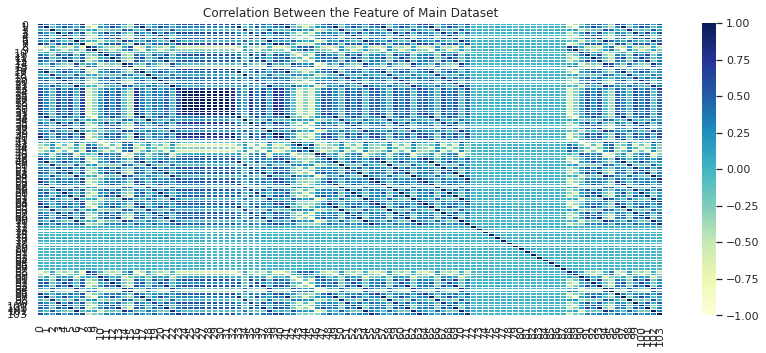

In [ ]:
# Main Dataset

X = pd.DataFrame(X)
corr = X.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Main Dataset")
plt.show()

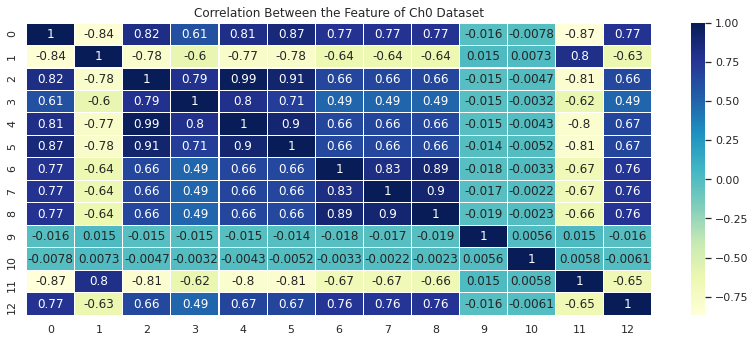

In [ ]:
# Ch0 Dataset

X_ch0 = pd.DataFrame(X_ch0)
corr = X_ch0.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch0 Dataset")
plt.show()

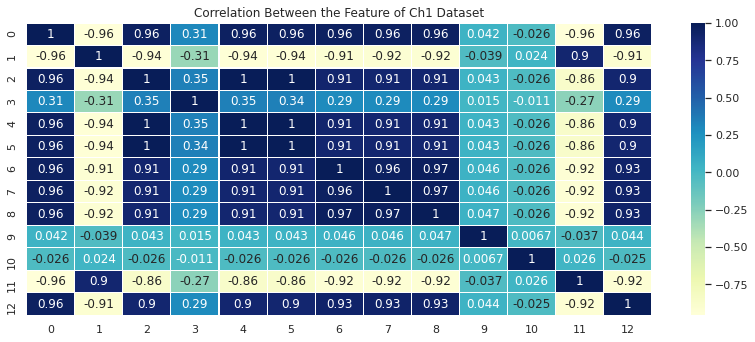

In [ ]:
# Ch1 Dataset

X_ch1 = pd.DataFrame(X_ch1)
corr = X_ch1.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch1 Dataset")
plt.show()

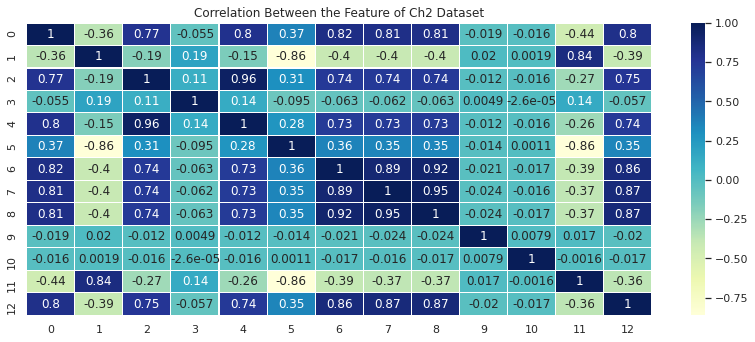

In [ ]:
# Ch2 Dataset

X_ch2 = pd.DataFrame(X_ch2)
corr = X_ch2.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch2 Dataset")
plt.show()

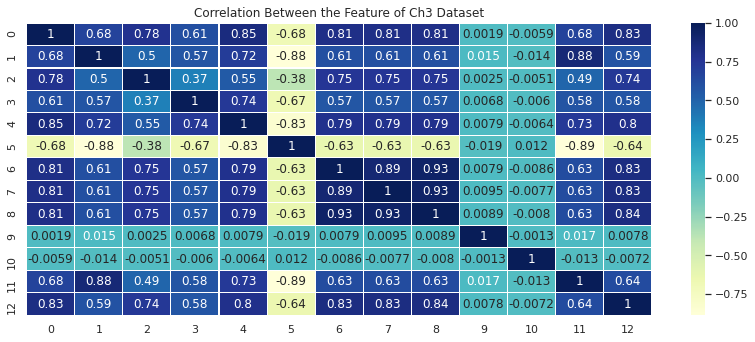

In [ ]:
# Ch3 Dataset

X_ch3 = pd.DataFrame(X_ch3)
corr = X_ch3.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch3 Dataset")
plt.show()

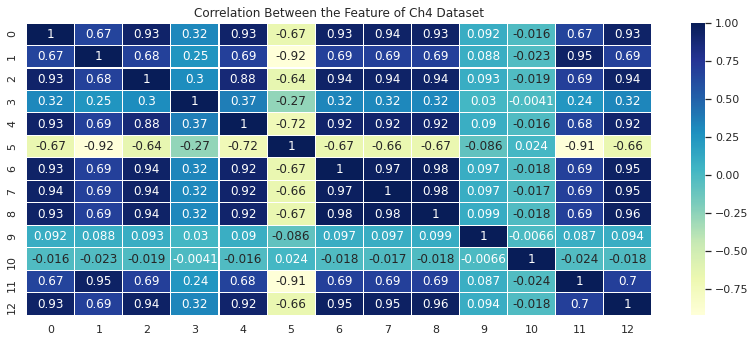

In [ ]:
# Ch4 Dataset

X_ch4 = pd.DataFrame(X_ch4)
corr = X_ch4.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch4 Dataset")
plt.show()

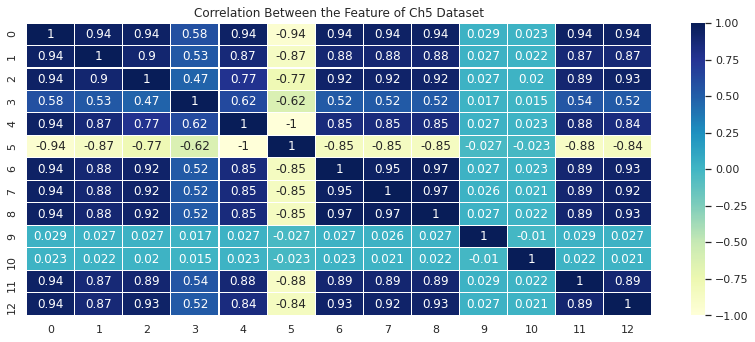

In [ ]:
# Ch5 Dataset

X_ch5 = pd.DataFrame(X_ch5)
corr = X_ch5.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch5 Dataset")
plt.show()

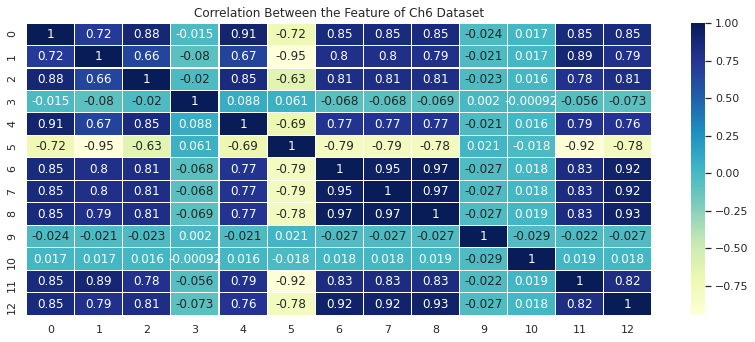

In [ ]:
# Ch6 Dataset

X_ch6 = pd.DataFrame(X_ch6)
corr = X_ch6.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch6 Dataset")
plt.show()

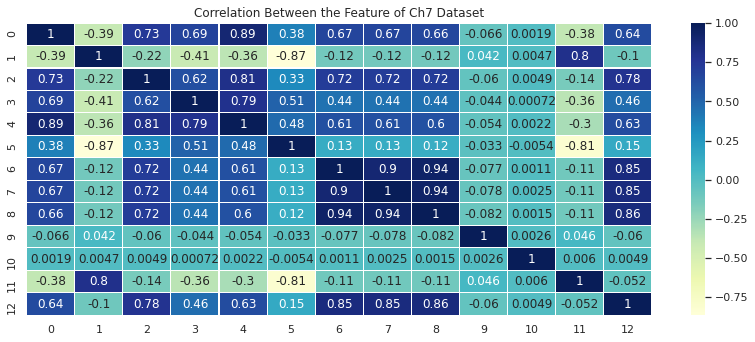

In [ ]:
# Ch7 Dataset

X_ch7 = pd.DataFrame(X_ch7)
corr = X_ch7.astype('float64').corr(method='kendall')

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,10
sns.set(font_scale=1)
ax = sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
          annot=True,
          annot_kws={"size": 12},
          linewidths=0.1)
ax.figure.subplots_adjust(bottom = 0.3)
plt.title("Correlation Between the Feature of Ch7 Dataset")
plt.show()

# Finding Gain Score

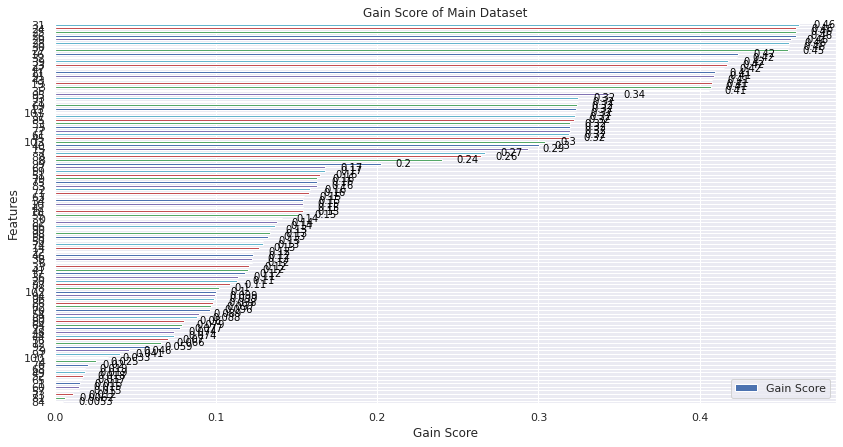

In [ ]:
# Main Dataset

X = X.fillna(0)
importances = mutual_info_classif(X, y)
df = pd.DataFrame({'Features' : X.columns[0:len(X.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Main Dataset")
plt.show()

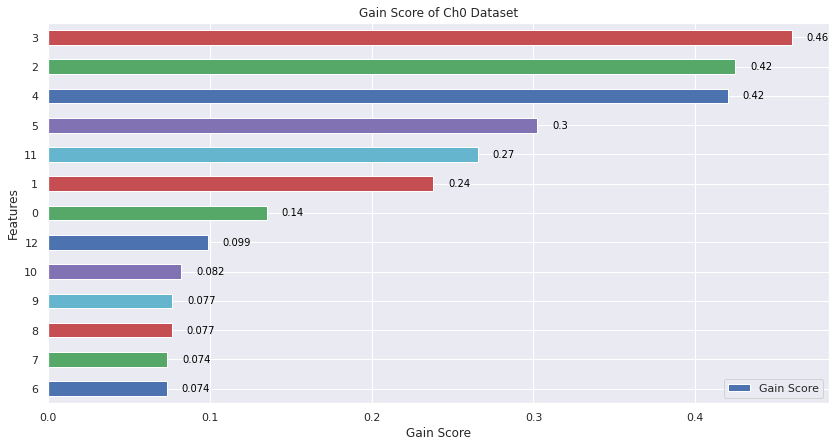

In [ ]:
# Ch0 Dataset

X_ch0 = X_ch0.fillna(0)
importances = mutual_info_classif(X_ch0,y_ch0)
df = pd.DataFrame({'Features' : X_ch0.columns[0:len(X_ch0.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch0 Dataset")
plt.show()

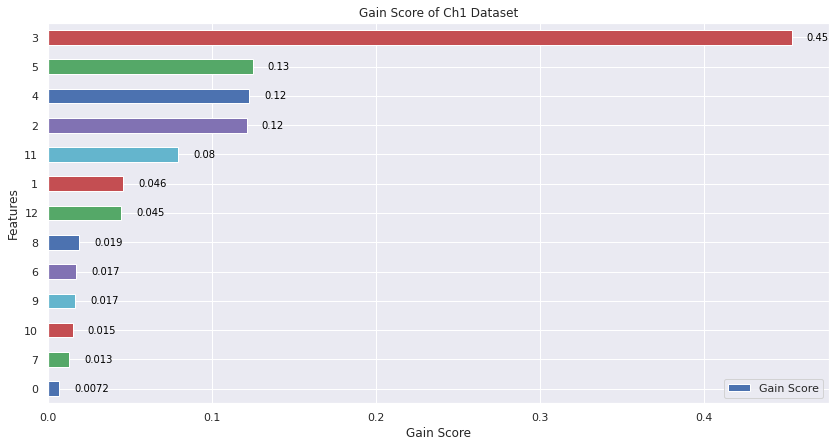

In [ ]:
# Ch1 Dataset

X_ch1 = X_ch1.fillna(0)
importances = mutual_info_classif(X_ch1,y_ch1)
df = pd.DataFrame({'Features' : X_ch1.columns[0:len(X_ch1.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch1 Dataset")
plt.show()

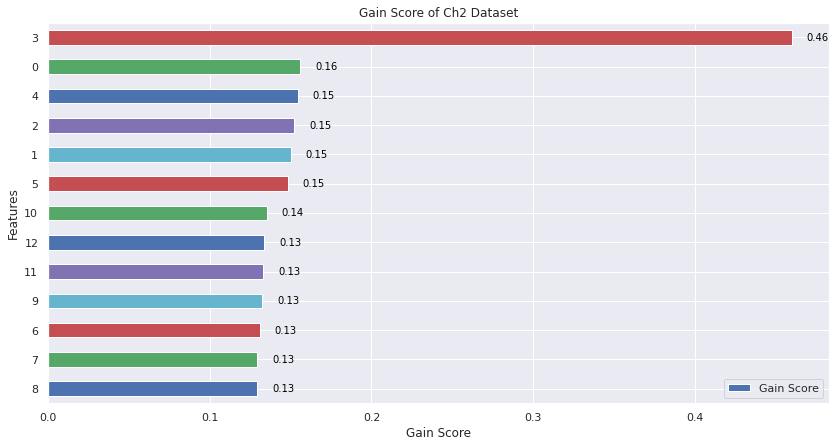

In [ ]:
# Ch2 Dataset

X_ch2 = X_ch2.fillna(0)
importances = mutual_info_classif(X_ch2,y_ch2)
df = pd.DataFrame({'Features' : X_ch2.columns[0:len(X_ch2.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch2 Dataset")
plt.show()

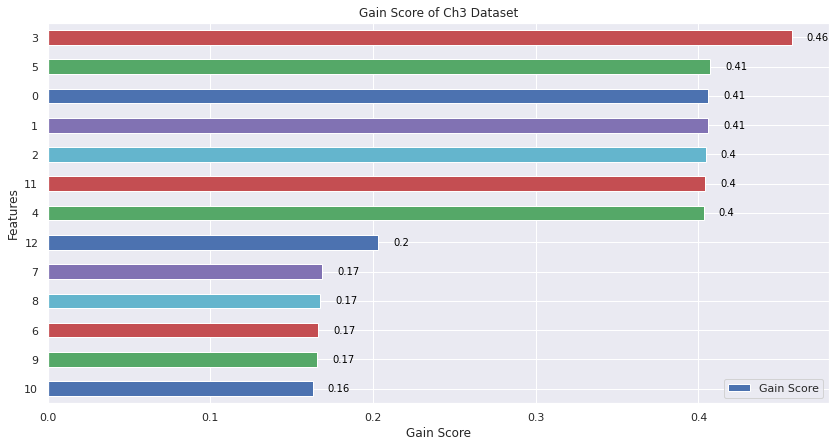

In [ ]:
# Ch3 Dataset

X_ch3 = X_ch3.fillna(0)
importances = mutual_info_classif(X_ch3,y_ch3)
df = pd.DataFrame({'Features' : X_ch3.columns[0:len(X_ch3.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch3 Dataset")
plt.show()

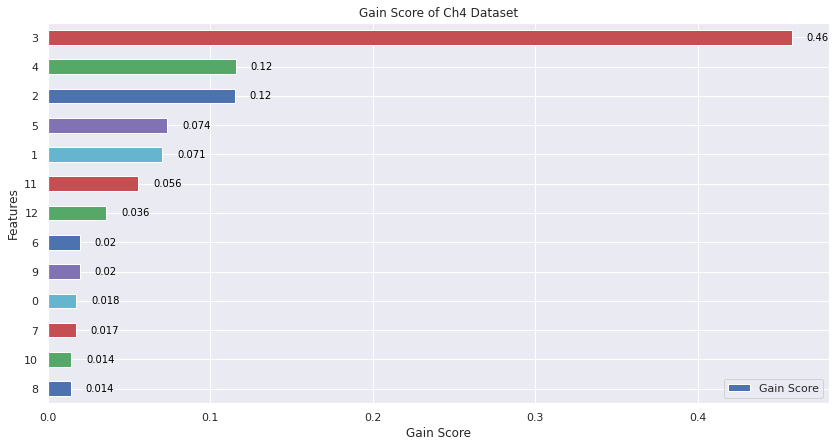

In [ ]:
# Ch4 Dataset

X_ch4 = X_ch4.fillna(0)
importances = mutual_info_classif(X_ch4,y_ch4)
df = pd.DataFrame({'Features' : X_ch4.columns[0:len(X_ch4.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch4 Dataset")
plt.show()

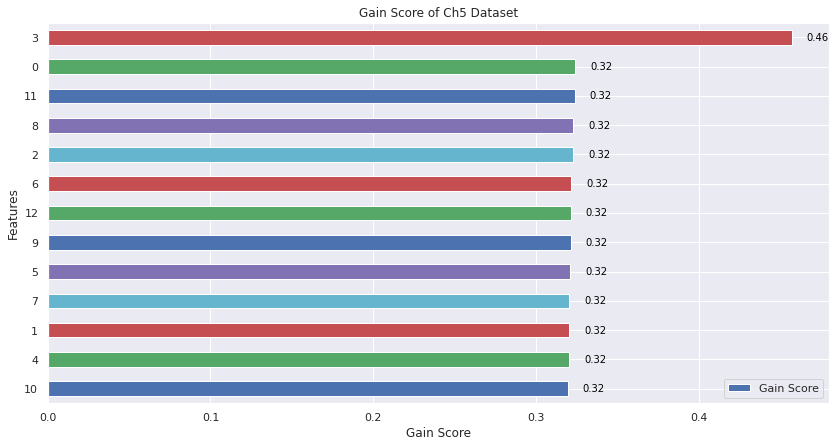

In [ ]:
# Ch5 Dataset

X_ch5 = X_ch5.fillna(0)
importances = mutual_info_classif(X_ch5,y_ch5)
df = pd.DataFrame({'Features' : X_ch5.columns[0:len(X_ch5.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch5 Dataset")
plt.show()

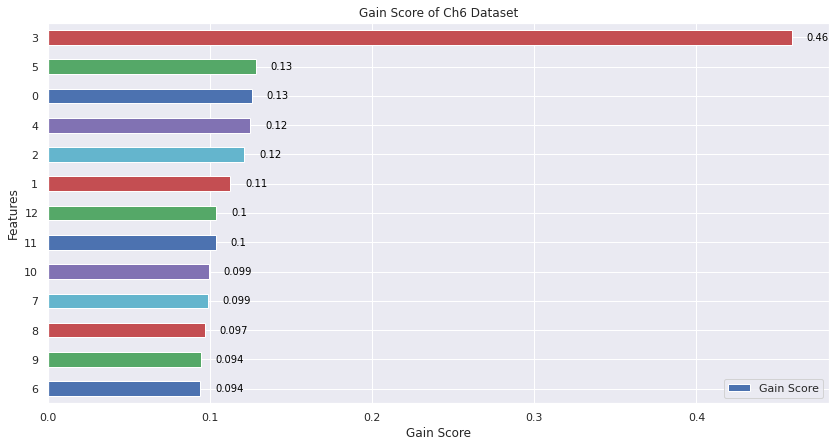

In [ ]:
# Ch6 Dataset

X_ch6 = X_ch6.fillna(0)
importances = mutual_info_classif(X_ch6,y_ch6)
df = pd.DataFrame({'Features' : X_ch6.columns[0:len(X_ch6.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch6 Dataset")
plt.show()

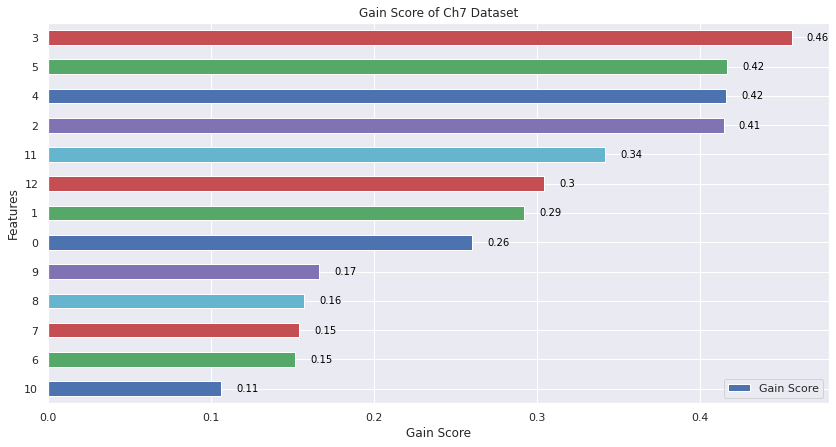

In [ ]:
# Ch7 Dataset

X_ch7 = X_ch7.fillna(0)
importances = mutual_info_classif(X_ch7,y_ch7)
df = pd.DataFrame({'Features' : X_ch7.columns[0:len(X_ch7.columns)] , 'Gain Score' : importances})
df = df.sort_values('Gain Score')

fisize=(14, 7)
fig, ax = plt.subplots(figsize=fisize)
df.plot(kind='barh', x='Features', y='Gain Score', ax=ax, color=['b', 'g', 'r', 'c', 'm'])
vmax = df['Gain Score'].max()
plt.xlabel("Gain Score")

for i, value in enumerate(df['Gain Score']):
    ax.text(value+vmax*0.02, i, f'{value:,.2}', fontsize='small', va='center', color='black')
plt.title("Gain Score of Ch7 Dataset")
plt.show()

# Split Dataset into Training and Testing Data

In [ ]:
# Main Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

# Ch0 Dataset
X_train_ch0, X_test_ch0, y_train_ch0, y_test_ch0 = train_test_split(X_ch0, y_ch0, test_size=0.2, random_state=42, shuffle = True)

# Ch1 Dataset
X_train_ch1, X_test_ch1, y_train_ch1, y_test_ch1 = train_test_split(X_ch1, y_ch1, test_size=0.2, random_state=42, shuffle = True)

# Ch2 Dataset
X_train_ch2, X_test_ch2, y_train_ch2, y_test_ch2 = train_test_split(X_ch2, y_ch2, test_size=0.2, random_state=42, shuffle = True)

# Ch4 Dataset
X_train_ch3, X_test_ch3, y_train_ch3, y_test_ch3 = train_test_split(X_ch3, y_ch3, test_size=0.2, random_state=42, shuffle = True)

# Ch5 Dataset
X_train_ch4, X_test_ch4, y_train_ch4, y_test_ch4 = train_test_split(X_ch4, y_ch4, test_size=0.2, random_state=42, shuffle = True)

# Ch5 Dataset
X_train_ch5, X_test_ch5, y_train_ch5, y_test_ch5 = train_test_split(X_ch5, y_ch5, test_size=0.2, random_state=42, shuffle = True)

# Ch6 Dataset
X_train_ch6, X_test_ch6, y_train_ch6, y_test_ch6 = train_test_split(X_ch6, y_ch6, test_size=0.2, random_state=42, shuffle = True)

# Ch7 Dataset
X_train_ch7, X_test_ch7, y_train_ch7, y_test_ch7 = train_test_split(X_ch7, y_ch7, test_size=0.2, random_state=42, shuffle = True)

# Train and Test Machine Learning Models

### Main Dataset

In [ ]:
# Train Model
model_svc = SVC(probability=True, gamma='auto',random_state=64).fit(X_train, y_train)
model_bayes = GaussianNB().fit(X_train, y_train)
model_tree = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train, y_train)
model_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
model_LDA= LinearDiscriminantAnalysis().fit(X_train, y_train)
model_randomforest= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
model_neuralNetwork= MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train)
model_logReg = LogisticRegression().fit(X_train,y_train)
model_elastNet = ElasticNet().fit(X_train,y_train)

# get Predictions
svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Caluclate Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


      Accuracy on Main Dataset

SVC:                         94.07 %
GaussianNB:                  63.99 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        94.07 %
LinearDiscriminantAnalysis:  94.07 %
RandomForestClassifier:      94.07 %
MLPClassifier:               94.07 %
ElasticNet:                  70.48 %
LogisticRegression:          94.07 %




### CH-0 Dataset

In [ ]:
# Train Model
model_svc_ch0 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch0, y_train_ch0)
model_bayes_ch0 = GaussianNB().fit(X_train_ch0, y_train_ch0)
model_tree_ch0 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch0, y_train_ch0)
model_knn_ch0 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch0, y_train_ch0)
model_LDA_ch0= LinearDiscriminantAnalysis().fit(X_train_ch0, y_train_ch0)
model_randomforest_ch0= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch0, y_train_ch0)
model_neuralNetwork_ch0= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch0, y_train_ch0)
model_logReg_ch0 = LogisticRegression().fit(X_train_ch0,y_train_ch0)
model_elastNet_ch0 = ElasticNet().fit(X_train_ch0,y_train_ch0)

# get Predictions
svc_pred_ch0 = model_svc_ch0.predict(X_test_ch0)
bayes_pred_ch0 = model_bayes_ch0.predict(X_test_ch0)
tree_pred_ch0 = model_tree_ch0.predict(X_test_ch0)
knn_pred_ch0 = model_knn_ch0.predict(X_test_ch0)
LDA_pred_ch0 = model_LDA_ch0.predict(X_test_ch0)
rf_pred_ch0 = model_randomforest_ch0.predict(X_test_ch0)
nn_pred_ch0 = model_neuralNetwork_ch0.predict(X_test_ch0)
en_pred_ch0 = np.round(model_elastNet_ch0.predict(X_test_ch0))
lr_pred_ch0 = model_logReg_ch0.predict(X_test_ch0)

# Caluclate Accuracy
svc_acc_ch0 = accuracy_score(y_test_ch0,svc_pred_ch0)
bayes_acc_ch0 = accuracy_score(y_test_ch0,bayes_pred_ch0)
tree_acc_ch0 = accuracy_score(y_test_ch0,tree_pred_ch0)
knn_acc_ch0 = accuracy_score(y_test_ch0,knn_pred_ch0)
LDA_acc_ch0 = accuracy_score(y_test_ch0,LDA_pred_ch0)
rf_acc_ch0 = accuracy_score(y_test_ch0,rf_pred_ch0)
nn_acc_ch0 = accuracy_score(y_test_ch0,nn_pred_ch0)
en_acc_ch0 = accuracy_score(y_test_ch0,en_pred_ch0)
lr_acc_ch0 = accuracy_score(y_test_ch0,lr_pred_ch0)

# Print Results
print("\n====================================")
print("      Accuracy on CH-0 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch0*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch0*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch0*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch0*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch0*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch0*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch0*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch0*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch0*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-0 Dataset

SVC:                         91.27 %
GaussianNB:                  68.47 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        89.42 %
LinearDiscriminantAnalysis:  90.82 %
RandomForestClassifier:      94.05 %
MLPClassifier:               91.46 %
ElasticNet:                  70.48 %
LogisticRegression:          92.04 %




### CH-1 Dataset

In [ ]:
# Train Model
model_svc_ch1 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch1, y_train_ch1)
model_bayes_ch1 = GaussianNB().fit(X_train_ch1, y_train_ch1)
model_tree_ch1 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch1, y_train_ch1)
model_knn_ch1 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch1, y_train_ch1)
model_LDA_ch1= LinearDiscriminantAnalysis().fit(X_train_ch1, y_train_ch1)
model_randomforest_ch1= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch1, y_train_ch1)
model_neuralNetwork_ch1= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch1, y_train_ch1)
model_logReg_ch1 = LogisticRegression().fit(X_train_ch1,y_train_ch1)
model_elastNet_ch1 = ElasticNet().fit(X_train_ch1,y_train_ch1)

# get Predictions
svc_pred_ch1 = model_svc_ch1.predict(X_test_ch1)
bayes_pred_ch1 = model_bayes_ch1.predict(X_test_ch1)
tree_pred_ch1 = model_tree_ch1.predict(X_test_ch1)
knn_pred_ch1 = model_knn_ch1.predict(X_test_ch1)
LDA_pred_ch1 = model_LDA_ch1.predict(X_test_ch1)
rf_pred_ch1 = model_randomforest_ch1.predict(X_test_ch1)
nn_pred_ch1 = model_neuralNetwork_ch1.predict(X_test_ch1)
en_pred_ch1 = np.round(model_elastNet_ch1.predict(X_test_ch1))
lr_pred_ch1 = model_logReg_ch1.predict(X_test_ch1)

# Caluclate Accuracy
svc_acc_ch1 = accuracy_score(y_test_ch1,svc_pred_ch1)
bayes_acc_ch1 = accuracy_score(y_test_ch1,bayes_pred_ch1)
tree_acc_ch1 = accuracy_score(y_test_ch1,tree_pred_ch1)
knn_acc_ch1 = accuracy_score(y_test_ch1,knn_pred_ch1)
LDA_acc_ch1 = accuracy_score(y_test_ch1,LDA_pred_ch1)
rf_acc_ch1 = accuracy_score(y_test_ch1,rf_pred_ch1)
nn_acc_ch1 = accuracy_score(y_test_ch1,nn_pred_ch1)
en_acc_ch1 = accuracy_score(y_test_ch1,en_pred_ch1)
lr_acc_ch1 = accuracy_score(y_test_ch1,lr_pred_ch1)

# Print Results
print("\n====================================")
print("      Accuracy on CH-1 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch1*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch1*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch1*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch1*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch1*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch1*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch1*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch1*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch1*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-1 Dataset

SVC:                         70.82 %
GaussianNB:                  69.63 %
DecisionTreeClassifier:      94.05 %
KNeighborsClassifier:        86.11 %
LinearDiscriminantAnalysis:  77.04 %
RandomForestClassifier:      94.07 %
MLPClassifier:               70.48 %
ElasticNet:                  70.48 %
LogisticRegression:          70.74 %




### CH-2 Dataset

In [ ]:
# Train Model
model_svc_ch2 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch2, y_train_ch2)
model_bayes_ch2 = GaussianNB().fit(X_train_ch2, y_train_ch2)
model_tree_ch2 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch2, y_train_ch2)
model_knn_ch2 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch2, y_train_ch2)
model_LDA_ch2= LinearDiscriminantAnalysis().fit(X_train_ch2, y_train_ch2)
model_randomforest_ch2= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch2, y_train_ch2)
model_neuralNetwork_ch2= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch2, y_train_ch2)
model_logReg_ch2 = LogisticRegression().fit(X_train_ch2,y_train_ch2)
model_elastNet_ch2 = ElasticNet().fit(X_train_ch2,y_train_ch2)

# get Predictions
svc_pred_ch2 = model_svc_ch2.predict(X_test_ch2)
bayes_pred_ch2 = model_bayes_ch2.predict(X_test_ch2)
tree_pred_ch2 = model_tree_ch2.predict(X_test_ch2)
knn_pred_ch2 = model_knn_ch2.predict(X_test_ch2)
LDA_pred_ch2 = model_LDA_ch2.predict(X_test_ch2)
rf_pred_ch2 = model_randomforest_ch2.predict(X_test_ch2)
nn_pred_ch2 = model_neuralNetwork_ch2.predict(X_test_ch2)
en_pred_ch2 = np.round(model_elastNet_ch2.predict(X_test_ch2))
lr_pred_ch2 = model_logReg_ch2.predict(X_test_ch2)

# Caluclate Accuracy
svc_acc_ch2 = accuracy_score(y_test_ch2,svc_pred_ch2)
bayes_acc_ch2 = accuracy_score(y_test_ch2,bayes_pred_ch2)
tree_acc_ch2 = accuracy_score(y_test_ch2,tree_pred_ch2)
knn_acc_ch2 = accuracy_score(y_test_ch2,knn_pred_ch2)
LDA_acc_ch2 = accuracy_score(y_test_ch2,LDA_pred_ch2)
rf_acc_ch2 = accuracy_score(y_test_ch2,rf_pred_ch2)
nn_acc_ch2 = accuracy_score(y_test_ch2,nn_pred_ch2)
en_acc_ch2 = accuracy_score(y_test_ch2,en_pred_ch2)
lr_acc_ch2 = accuracy_score(y_test_ch2,lr_pred_ch2)

# Print Results
print("\n====================================")
print("      Accuracy on CH-2 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch2*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch2*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch2*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch2*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch2*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch2*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch2*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch2*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch2*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-2 Dataset

SVC:                         76.9 %
GaussianNB:                  59.18 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        94.07 %
LinearDiscriminantAnalysis:  76.9 %
RandomForestClassifier:      94.07 %
MLPClassifier:               76.9 %
ElasticNet:                  70.48 %
LogisticRegression:          76.9 %




### CH-3 Dataset

In [ ]:
# Train Model
model_svc_ch3 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch3, y_train_ch3)
model_bayes_ch3 = GaussianNB().fit(X_train_ch3, y_train_ch3)
model_tree_ch3 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch3, y_train_ch3)
model_knn_ch3 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch3, y_train_ch3)
model_LDA_ch3= LinearDiscriminantAnalysis().fit(X_train_ch3, y_train_ch3)
model_randomforest_ch3= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch3, y_train_ch3)
model_neuralNetwork_ch3= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch3, y_train_ch3)
model_logReg_ch3 = LogisticRegression().fit(X_train_ch3,y_train_ch3)
model_elastNet_ch3 = ElasticNet().fit(X_train_ch3,y_train_ch3)

# get Predictions
svc_pred_ch3 = model_svc_ch3.predict(X_test_ch3)
bayes_pred_ch3 = model_bayes_ch3.predict(X_test_ch3)
tree_pred_ch3 = model_tree_ch3.predict(X_test_ch3)
knn_pred_ch3 = model_knn_ch3.predict(X_test_ch3)
LDA_pred_ch3 = model_LDA_ch3.predict(X_test_ch3)
rf_pred_ch3 = model_randomforest_ch3.predict(X_test_ch3)
nn_pred_ch3 = model_neuralNetwork_ch3.predict(X_test_ch3)
en_pred_ch3 = np.round(model_elastNet_ch3.predict(X_test_ch3))
lr_pred_ch3 = model_logReg_ch3.predict(X_test_ch3)

# Caluclate Accuracy
svc_acc_ch3 = accuracy_score(y_test_ch3,svc_pred_ch3)
bayes_acc_ch3 = accuracy_score(y_test_ch3,bayes_pred_ch3)
tree_acc_ch3 = accuracy_score(y_test_ch3,tree_pred_ch3)
knn_acc_ch3 = accuracy_score(y_test_ch3,knn_pred_ch3)
LDA_acc_ch3 = accuracy_score(y_test_ch3,LDA_pred_ch3)
rf_acc_ch3 = accuracy_score(y_test_ch3,rf_pred_ch3)
nn_acc_ch3 = accuracy_score(y_test_ch3,nn_pred_ch3)
en_acc_ch3 = accuracy_score(y_test_ch3,en_pred_ch3)
lr_acc_ch3 = accuracy_score(y_test_ch3,lr_pred_ch3)

# Print Results
print("\n====================================")
print("      Accuracy on CH-3 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch3*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch3*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch3*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch3*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch3*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch3*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch3*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch3*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch3*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-3 Dataset

SVC:                         94.07 %
GaussianNB:                  84.21 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        94.07 %
LinearDiscriminantAnalysis:  94.07 %
RandomForestClassifier:      94.07 %
MLPClassifier:               94.07 %
ElasticNet:                  70.48 %
LogisticRegression:          94.07 %




### CH-4 Dataset 

In [ ]:
# Train Model
model_svc_ch4 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch4, y_train_ch4)
model_bayes_ch4 = GaussianNB().fit(X_train_ch4, y_train_ch4)
model_tree_ch4 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch4, y_train_ch4)
model_knn_ch4 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch4, y_train_ch4)
model_LDA_ch4= LinearDiscriminantAnalysis().fit(X_train_ch4, y_train_ch4)
model_randomforest_ch4= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch4, y_train_ch4)
model_neuralNetwork_ch4= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch4, y_train_ch4)
model_logReg_ch4 = LogisticRegression().fit(X_train_ch4,y_train_ch4)
model_elastNet_ch4 = ElasticNet().fit(X_train_ch4,y_train_ch4)

# get Predictions
svc_pred_ch4 = model_svc_ch4.predict(X_test_ch4)
bayes_pred_ch4 = model_bayes_ch4.predict(X_test_ch4)
tree_pred_ch4 = model_tree_ch4.predict(X_test_ch4)
knn_pred_ch4 = model_knn_ch4.predict(X_test_ch4)
LDA_pred_ch4 = model_LDA_ch4.predict(X_test_ch4)
rf_pred_ch4 = model_randomforest_ch4.predict(X_test_ch4)
nn_pred_ch4 = model_neuralNetwork_ch4.predict(X_test_ch4)
en_pred_ch4 = np.round(model_elastNet_ch4.predict(X_test_ch4))
lr_pred_ch4 = model_logReg_ch4.predict(X_test_ch4)

# Caluclate Accuracy
svc_acc_ch4 = accuracy_score(y_test_ch4,svc_pred_ch4)
bayes_acc_ch4 = accuracy_score(y_test_ch4,bayes_pred_ch4)
tree_acc_ch4 = accuracy_score(y_test_ch4,tree_pred_ch4)
knn_acc_ch4 = accuracy_score(y_test_ch4,knn_pred_ch4)
LDA_acc_ch4 = accuracy_score(y_test_ch4,LDA_pred_ch4)
rf_acc_ch4 = accuracy_score(y_test_ch4,rf_pred_ch4)
nn_acc_ch4 = accuracy_score(y_test_ch4,nn_pred_ch4)
en_acc_ch4 = accuracy_score(y_test_ch4,en_pred_ch4)
lr_acc_ch4 = accuracy_score(y_test_ch4,lr_pred_ch4)

# Print Results
print("\n====================================")
print("      Accuracy on CH-4 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch4*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch4*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch4*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch4*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch4*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch4*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch4*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch4*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch4*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-4 Dataset

SVC:                         74.26 %
GaussianNB:                  70.82 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        91.38 %
LinearDiscriminantAnalysis:  73.28 %
RandomForestClassifier:      94.07 %
MLPClassifier:               73.6 %
ElasticNet:                  70.48 %
LogisticRegression:          74.05 %




### CH-5 Dataset

In [ ]:
# Train Model
model_svc_ch5 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch5, y_train_ch5)
model_bayes_ch5 = GaussianNB().fit(X_train_ch5, y_train_ch5)
model_tree_ch5 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch5, y_train_ch5)
model_knn_ch5 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch5, y_train_ch5)
model_LDA_ch5= LinearDiscriminantAnalysis().fit(X_train_ch5, y_train_ch5)
model_randomforest_ch5= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch5, y_train_ch5)
model_neuralNetwork_ch5= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch5, y_train_ch5)
model_logReg_ch5 = LogisticRegression().fit(X_train_ch5,y_train_ch5)
model_elastNet_ch5 = ElasticNet().fit(X_train_ch5,y_train_ch5)

# get Predictions
svc_pred_ch5 = model_svc_ch5.predict(X_test_ch5)
bayes_pred_ch5 = model_bayes_ch5.predict(X_test_ch5)
tree_pred_ch5 = model_tree_ch5.predict(X_test_ch5)
knn_pred_ch5 = model_knn_ch5.predict(X_test_ch5)
LDA_pred_ch5 = model_LDA_ch5.predict(X_test_ch5)
rf_pred_ch5 = model_randomforest_ch5.predict(X_test_ch5)
nn_pred_ch5 = model_neuralNetwork_ch5.predict(X_test_ch5)
en_pred_ch5 = np.round(model_elastNet_ch5.predict(X_test_ch5))
lr_pred_ch5 = model_logReg_ch5.predict(X_test_ch5)

# Caluclate Accuracy
svc_acc_ch5 = accuracy_score(y_test_ch5,svc_pred_ch5)
bayes_acc_ch5 = accuracy_score(y_test_ch5,bayes_pred_ch5)
tree_acc_ch5 = accuracy_score(y_test_ch5,tree_pred_ch5)
knn_acc_ch5 = accuracy_score(y_test_ch5,knn_pred_ch5)
LDA_acc_ch5 = accuracy_score(y_test_ch5,LDA_pred_ch5)
rf_acc_ch5 = accuracy_score(y_test_ch5,rf_pred_ch5)
nn_acc_ch5 = accuracy_score(y_test_ch5,nn_pred_ch5)
en_acc_ch5 = accuracy_score(y_test_ch5,en_pred_ch5)
lr_acc_ch5 = accuracy_score(y_test_ch5,lr_pred_ch5)

# Print Results
print("\n====================================")
print("      Accuracy on CH-5 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch5*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch5*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch5*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch5*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch5*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch5*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch5*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch5*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch5*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-5 Dataset

SVC:                         90.79 %
GaussianNB:                  90.79 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        94.07 %
LinearDiscriminantAnalysis:  90.79 %
RandomForestClassifier:      94.07 %
MLPClassifier:               90.79 %
ElasticNet:                  70.48 %
LogisticRegression:          90.79 %




### CH-6 Dataset

In [ ]:
# Train Model
model_svc_ch6 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch6, y_train_ch6)
model_bayes_ch6 = GaussianNB().fit(X_train_ch6, y_train_ch6)
model_tree_ch6 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch6, y_train_ch6)
model_knn_ch6 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch6, y_train_ch6)
model_LDA_ch6= LinearDiscriminantAnalysis().fit(X_train_ch6, y_train_ch6)
model_randomforest_ch6= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch6, y_train_ch6)
model_neuralNetwork_ch6= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch6, y_train_ch6)
model_logReg_ch6 = LogisticRegression().fit(X_train_ch6,y_train_ch6)
model_elastNet_ch6 = ElasticNet().fit(X_train_ch6,y_train_ch6)

# get Predictions
svc_pred_ch6 = model_svc_ch6.predict(X_test_ch6)
bayes_pred_ch6 = model_bayes_ch6.predict(X_test_ch6)
tree_pred_ch6 = model_tree_ch6.predict(X_test_ch6)
knn_pred_ch6 = model_knn_ch6.predict(X_test_ch6)
LDA_pred_ch6 = model_LDA_ch6.predict(X_test_ch6)
rf_pred_ch6 = model_randomforest_ch6.predict(X_test_ch6)
nn_pred_ch6 = model_neuralNetwork_ch6.predict(X_test_ch6)
en_pred_ch6 = np.round(model_elastNet_ch6.predict(X_test_ch6))
lr_pred_ch6 = model_logReg_ch6.predict(X_test_ch6)

# Caluclate Accuracy
svc_acc_ch6 = accuracy_score(y_test_ch6,svc_pred_ch6)
bayes_acc_ch6 = accuracy_score(y_test_ch6,bayes_pred_ch6)
tree_acc_ch6 = accuracy_score(y_test_ch6,tree_pred_ch6)
knn_acc_ch6 = accuracy_score(y_test_ch6,knn_pred_ch6)
LDA_acc_ch6 = accuracy_score(y_test_ch6,LDA_pred_ch6)
rf_acc_ch6 = accuracy_score(y_test_ch6,rf_pred_ch6)
nn_acc_ch6 = accuracy_score(y_test_ch6,nn_pred_ch6)
en_acc_ch6 = accuracy_score(y_test_ch6,en_pred_ch6)
lr_acc_ch6 = accuracy_score(y_test_ch6,lr_pred_ch6)

# Print Results
print("\n====================================")
print("      Accuracy on CH-6 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch6*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch6*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch6*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch6*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch6*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch6*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch6*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch6*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch6*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-6 Dataset

SVC:                         73.47 %
GaussianNB:                  52.09 %
DecisionTreeClassifier:      92.86 %
KNeighborsClassifier:        94.07 %
LinearDiscriminantAnalysis:  73.47 %
RandomForestClassifier:      93.73 %
MLPClassifier:               73.47 %
ElasticNet:                  70.48 %
LogisticRegression:          73.47 %




### CH-7 Dataset

In [ ]:
# Train Model
model_svc_ch7 = SVC(probability=True, gamma='auto',random_state=64).fit(X_train_ch7, y_train_ch7)
model_bayes_ch7 = GaussianNB().fit(X_train_ch7, y_train_ch7)
model_tree_ch7 = DecisionTreeClassifier(random_state=64,max_depth=10).fit(X_train_ch7, y_train_ch7)
model_knn_ch7 = KNeighborsClassifier(n_neighbors=7).fit(X_train_ch7, y_train_ch7)
model_LDA_ch7= LinearDiscriminantAnalysis().fit(X_train_ch7, y_train_ch7)
model_randomforest_ch7= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_ch7, y_train_ch7)
model_neuralNetwork_ch7= MLPClassifier(alpha=1, max_iter=1000).fit(X_train_ch7, y_train_ch7)
model_logReg_ch7 = LogisticRegression().fit(X_train_ch7,y_train_ch7)
model_elastNet_ch7 = ElasticNet().fit(X_train_ch7,y_train_ch7)

# get Predictions
svc_pred_ch7 = model_svc_ch7.predict(X_test_ch7)
bayes_pred_ch7 = model_bayes_ch7.predict(X_test_ch7)
tree_pred_ch7 = model_tree_ch7.predict(X_test_ch7)
knn_pred_ch7 = model_knn_ch7.predict(X_test_ch7)
LDA_pred_ch7 = model_LDA_ch7.predict(X_test_ch7)
rf_pred_ch7 = model_randomforest_ch7.predict(X_test_ch7)
nn_pred_ch7 = model_neuralNetwork_ch7.predict(X_test_ch7)
en_pred_ch7 = np.round(model_elastNet_ch7.predict(X_test_ch7))
lr_pred_ch7 = model_logReg_ch7.predict(X_test_ch7)

# Caluclate Accuracy
svc_acc_ch7 = accuracy_score(y_test_ch7,svc_pred_ch7)
bayes_acc_ch7 = accuracy_score(y_test_ch7,bayes_pred_ch7)
tree_acc_ch7 = accuracy_score(y_test_ch7,tree_pred_ch7)
knn_acc_ch7 = accuracy_score(y_test_ch7,knn_pred_ch7)
LDA_acc_ch7 = accuracy_score(y_test_ch7,LDA_pred_ch7)
rf_acc_ch7 = accuracy_score(y_test_ch7,rf_pred_ch7)
nn_acc_ch7 = accuracy_score(y_test_ch7,nn_pred_ch7)
en_acc_ch7 = accuracy_score(y_test_ch7,en_pred_ch7)
lr_acc_ch7 = accuracy_score(y_test_ch7,lr_pred_ch7)

# Print Results
print("\n====================================")
print("      Accuracy on CH-7 Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc_ch7*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc_ch7*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc_ch7*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc_ch7*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc_ch7*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc_ch7*100,2), "%")
print("MLPClassifier:              ", round(nn_acc_ch7*100,2), "%")
print("ElasticNet:                 ", round(en_acc_ch7*100,2), "%")
print("LogisticRegression:         ", round(lr_acc_ch7*100,2), "%")
print("\n====================================\n")


      Accuracy on CH-7 Dataset

SVC:                         92.8 %
GaussianNB:                  87.51 %
DecisionTreeClassifier:      94.07 %
KNeighborsClassifier:        92.46 %
LinearDiscriminantAnalysis:  93.12 %
RandomForestClassifier:      94.07 %
MLPClassifier:               92.57 %
ElasticNet:                  70.48 %
LogisticRegression:          93.49 %




# Train and Test Machine Learning Models with Bayesian Optimization

### User Defined Functions

In [ ]:
def perf_measure(y_true, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    y_true = y_true.values
    for i in range(len(y_pred)): 
        if y_true[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
            FP += 1
        if y_true[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
            FN += 1
    return (TP, FP, TN, FN)

In [ ]:
def calculate(inputs):
    TP,FP,TN,FN= inputs
    prob_of_detect = (TP/(TP+FN))*100
    prob_of_false = (FP/(FP+TN))*100
    prob_of_misdetect = (FN/(TP+FN))*100
    return prob_of_detect, prob_of_false, prob_of_misdetect

In [ ]:
def plot_cf(cf):
    df_cm = pd.DataFrame(cf, index = [i for i in [0,1]],
                      columns = [i for i in [0,1]])
    plt.figure(figsize = (4,3))
    sns.heatmap(df_cm, annot=True)

### Main Dataset

In [ ]:
# Main Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9353793240293671
OrderedDict([('C', 0.2407976965600978), ('degree', 3), ('gamma', 0.0035434738921028357)])

GaussianNB:

0.8722137707520339
OrderedDict([('var_smoothing', 0.01)])

DecisionTreeClassifier:

0.9353793240293671
OrderedDict([('criterion', 'entropy'), ('max_depth', 8.75), ('max_features', 'log2'), ('splitter', 'random')])

KNeighborsClassifier:

0.9353793240293671
OrderedDict([('n_neighbors', 4)])

LinearDiscriminantAnalysis:

0.9353793240293671
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.9353793240293671
OrderedDict([('max_depth', 1), ('min_samples_split', 2), ('n_estimators', 10)])

MLPClassifier:

0.9353793240293671
OrderedDict([('activation', 'logistic'), ('alpha', 0.32563043569698774), ('solver', 'adam')])

ElasticNet:

0.7594043791752068
OrderedDict([('alpha', 0.0001), ('l1_ratio', 1.0), ('selection', 'cyclic')])

LogisticRegression:

0.9353793240293671
OrderedDict([('C', 0.0007253979469778388), ('l1_ratio', 0.7500249999999999), ('solver', 'n

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


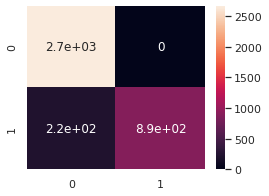

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.8759259259259259 (Prob of detection): 79.92831541218638 (Prob of false alarm): 9.196696696696696 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 245, 2419, 224)


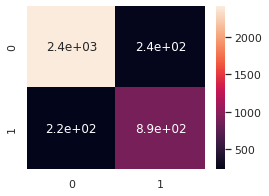

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9407407407407408 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


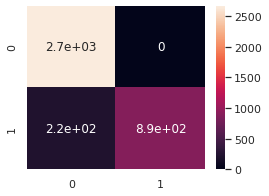

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


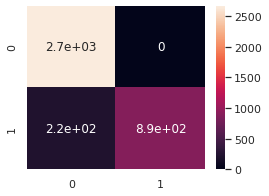

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


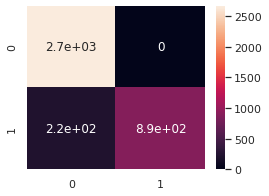

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


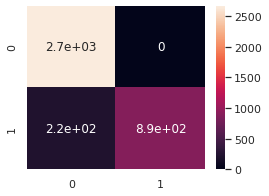

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


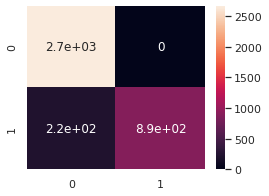

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


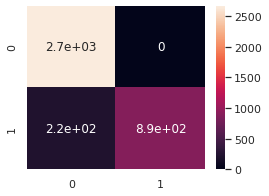

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


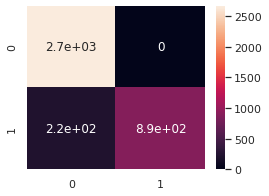

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.9407407407407408
0.8759259259259259
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  0




79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  0




0.0
9.196696696696696
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  0




20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
Min Prob of Misdetection:  20.07168458781362
Index of Min Prob of Misdetection for 9 Models:  0






## CH-0 Dataset

In [ ]:
# Ch0 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch0, y_ch0, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9248627554732456
OrderedDict([('C', 100.0), ('degree', 5), ('gamma', 0.042057176521161456)])

GaussianNB:

0.6848336530193796
OrderedDict([('var_smoothing', 1e-05)])

DecisionTreeClassifier:

0.9353131820887625
OrderedDict([('criterion', 'entropy'), ('max_depth', 16.5), ('max_features', 'log2'), ('splitter', 'random')])

KNeighborsClassifier:

0.8872279912692639
OrderedDict([('n_neighbors', 4)])

LinearDiscriminantAnalysis:

0.9000595277465441
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.9351808982075535
OrderedDict([('max_depth', 150), ('min_samples_split', 2), ('n_estimators', 10)])

MLPClassifier:

0.9307493881870494
OrderedDict([('activation', 'identity'), ('alpha', 0.4982884764379526), ('solver', 'lbfgs')])

ElasticNet:

0.5650956248432175
OrderedDict([('alpha', 0.0001), ('l1_ratio', 1.0), ('selection', 'cyclic')])

LogisticRegression:

0.9283021363846815
OrderedDict([('C', 65.49355338677803), ('l1_ratio', 1.0), ('solver', 'lbfgs')])

      Accuracy on Ma

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.9288359788359788 (Prob of detection): 77.15053763440861 (Prob of false alarm): 0.5255255255255256 (Prob of misdetection): 22.849462365591396
None
TP,FP,TN,FN:  (861, 14, 2650, 255)


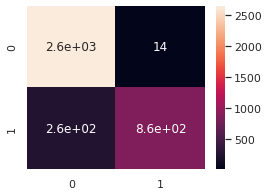

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.6846560846560846 (Prob of detection): 79.92831541218638 (Prob of false alarm): 36.33633633633634 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 968, 1696, 224)


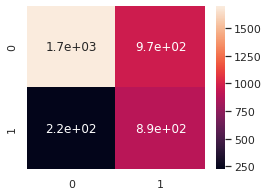

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9396825396825397 79.92831541218638 (Prob of false alarm): 0.15015015015015015 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 4, 2660, 224)


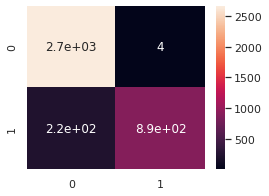

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.8928571428571429 (Prob of detection): 71.50537634408603 (Prob of false alarm): 3.2657657657657655 (Prob of misdetection): 28.49462365591398
None
TP,FP,TN,FN:  (798, 87, 2577, 318)


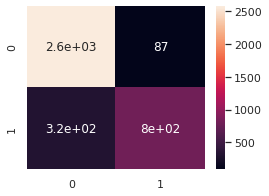

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.9082010582010582 (Prob of detection): 78.13620071684588 (Prob of false alarm): 3.8663663663663668 (Prob of misdetection): 21.863799283154123
None
TP,FP,TN,FN:  (872, 103, 2561, 244)


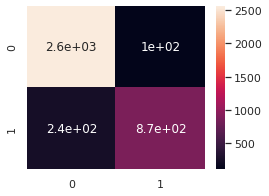

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


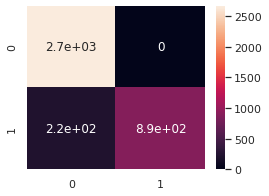

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.9306878306878307 (Prob of detection): 77.8673835125448 (Prob of false alarm): 0.5630630630630631 (Prob of misdetection): 22.1326164874552
None
TP,FP,TN,FN:  (869, 15, 2649, 247)


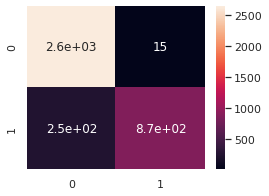

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.8965608465608466 (Prob of detection): 77.95698924731182 (Prob of false alarm): 5.442942942942943 (Prob of misdetection): 22.1326164874552
None
TP,FP,TN,FN:  (870, 145, 2519, 246)


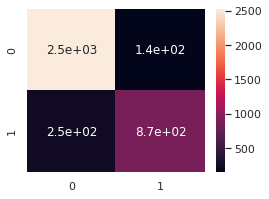

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.930952380952381 (Prob of detection): 78.31541218637993 (Prob of false alarm): 0.7132132132132132 (Prob of misdetection): 22.1326164874552
None
TP,FP,TN,FN:  (874, 19, 2645, 242)


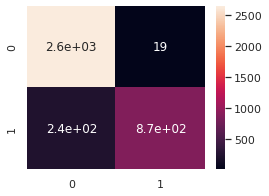

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.9288359788359788
0.6846560846560846
0.9396825396825397
0.8928571428571429
0.9082010582010582
0.9407407407407408
0.9306878306878307
0.8965608465608466
0.930952380952381
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  5




77.15053763440861
79.92831541218638
79.92831541218638
71.50537634408603
78.13620071684588
79.92831541218638
77.8673835125448
77.95698924731182
78.31541218637993
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  1




0.5255255255255256
36.33633633633634
0.15015015015015015
3.2657657657657655
3.8663663663663668
0.0
0.5630630630630631
5.442942942942943
0.7132132132132132
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  5




22.849462365591396
20.07168458781362
20.07168458781362
28.49462365591398
21.863799283154123
20.07168458781362
22.1326164874552
22.043010752688172
21.68458781362007
Min Prob of Misdetection:  20.07168458781362
Index of Min Pr

## CH-1 Dataset

In [ ]:
# Ch1 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch1, y_ch1, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.6969376281500099
OrderedDict([('C', 6.269665877620906e-05), ('degree', 4), ('gamma', 0.013667936469727379)])

GaussianNB:

0.6892651630398836
OrderedDict([('var_smoothing', 1e-06)])

DecisionTreeClassifier:

0.935247040148158
OrderedDict([('criterion', 'entropy'), ('max_depth', 16.5), ('max_features', 'log2'), ('splitter', 'random')])

KNeighborsClassifier:

0.861895628017726
OrderedDict([('n_neighbors', 2)])

LinearDiscriminantAnalysis:

0.7606323169521794
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.9351808982075535
OrderedDict([('max_depth', 81), ('min_samples_split', 8), ('n_estimators', 356)])

MLPClassifier:

0.7004431510020503
OrderedDict([('activation', 'tanh'), ('alpha', 0.49953400455185504), ('solver', 'lbfgs')])

ElasticNet:

0.03337628389320487
OrderedDict([('alpha', 0.00121778942013316), ('l1_ratio', 0.9421314755119352), ('selection', 'cyclic')])

LogisticRegression:

0.713076261657517
OrderedDict([('C', 98.83364356218115), ('l1_ratio', 0.0001), (

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.7047619047619048 (Prob of detection): 0.0 (Prob of false alarm): 0.0 (Prob of misdetection): 100.0
None
TP,FP,TN,FN:  (0, 0, 2664, 1116)


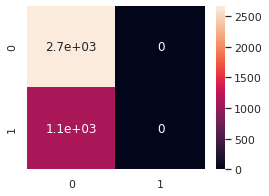

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.6962962962962963 (Prob of detection): 26.254480286738353 (Prob of false alarm): 12.1996996996997 (Prob of misdetection): 73.74551971326166
None
TP,FP,TN,FN:  (293, 325, 2339, 823)


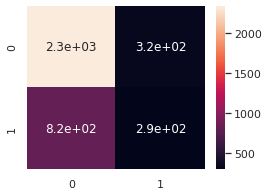

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9365079365079365 79.48028673835125 (Prob of false alarm): 0.4129129129129129 (Prob of misdetection): 20.519713261648747
None
TP,FP,TN,FN:  (887, 11, 2653, 229)


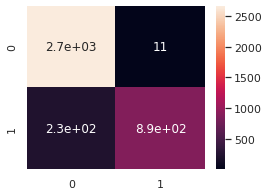

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.8671957671957672 (Prob of detection): 60.483870967741936 (Prob of false alarm): 2.28978978978979 (Prob of misdetection): 39.516129032258064
None
TP,FP,TN,FN:  (675, 61, 2603, 441)


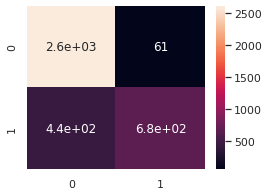

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.7722222222222223 (Prob of detection): 26.254480286738353 (Prob of false alarm): 1.4264264264264264 (Prob of misdetection): 73.74551971326166
None
TP,FP,TN,FN:  (293, 38, 2626, 823)


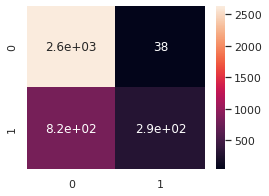

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


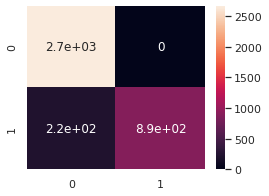

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.7484126984126984 (Prob of detection): 18.010752688172044 (Prob of false alarm): 1.3513513513513513 (Prob of misdetection): 81.98924731182797
None
TP,FP,TN,FN:  (201, 36, 2628, 915)


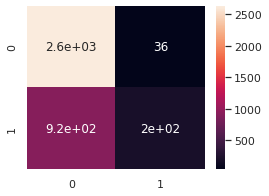

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.7092592592592593 (Prob of detection): 12.186379928315413 (Prob of false alarm): 4.466966966966967 (Prob of misdetection): 81.98924731182797
None
TP,FP,TN,FN:  (136, 119, 2545, 980)


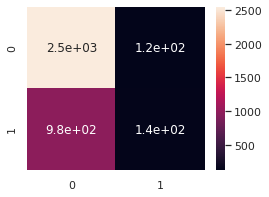

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.7357142857142858 (Prob of detection): 13.88888888888889 (Prob of false alarm): 1.4264264264264264 (Prob of misdetection): 81.98924731182797
None
TP,FP,TN,FN:  (155, 38, 2626, 961)


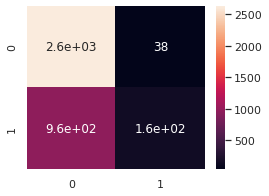

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.7047619047619048
0.6962962962962963
0.9365079365079365
0.8671957671957672
0.7722222222222223
0.9407407407407408
0.7484126984126984
0.7092592592592593
0.7357142857142858
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  5




0.0
26.254480286738353
79.48028673835125
60.483870967741936
26.254480286738353
79.92831541218638
18.010752688172044
12.186379928315413
13.88888888888889
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  5




0.0
12.1996996996997
0.4129129129129129
2.28978978978979
1.4264264264264264
0.0
1.3513513513513513
4.466966966966967
1.4264264264264264
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  0




100.0
73.74551971326166
20.519713261648747
39.516129032258064
73.74551971326166
20.07168458781362
81.98924731182797
87.81362007168458
86.11111111111111
Min Prob of Misdetection:  20.07168458781362
Index of Min Prob of Misdetection for 9 Models:  5




## CH-2 Dataset

In [ ]:
# Ch2 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch2, y_ch2, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.7720087307361598
OrderedDict([('C', 5.50580916666134), ('degree', 1), ('gamma', 1.700350496960051)])

GaussianNB:

0.6002381109861763
OrderedDict([('var_smoothing', 1e-06)])

DecisionTreeClassifier:

0.9353793240293671
OrderedDict([('criterion', 'gini'), ('max_depth', 32.0), ('max_features', 'log2'), ('splitter', 'random')])

KNeighborsClassifier:

0.935247040148158
OrderedDict([('n_neighbors', 1)])

LinearDiscriminantAnalysis:

0.7720087307361598
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.9353793240293671
OrderedDict([('max_depth', 2), ('min_samples_split', 10), ('n_estimators', 33)])

MLPClassifier:

0.7720087307361598
OrderedDict([('activation', 'logistic'), ('alpha', 0.2025208414669798), ('solver', 'adam')])

ElasticNet:

0.3193965012424279
OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.0001), ('selection', 'random')])

LogisticRegression:

0.7720087307361598
OrderedDict([('C', 0.18602271102091628), ('l1_ratio', 0.250075), ('solver', 'newton-cg')])

    

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.7690476190476191 (Prob of detection): 79.92831541218638 (Prob of false alarm): 24.36186186186186 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 649, 2015, 224)


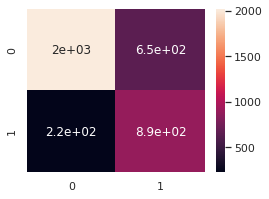

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.5917989417989418 (Prob of detection): 100.0 (Prob of false alarm): 57.92042042042041 (Prob of misdetection): 0.0
None
TP,FP,TN,FN:  (1116, 1543, 1121, 0)


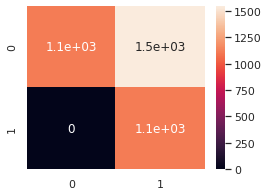

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9407407407407408 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


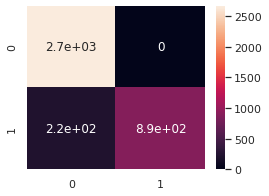

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


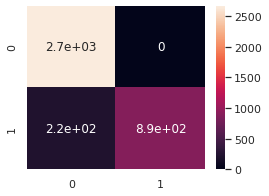

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.7690476190476191 (Prob of detection): 79.92831541218638 (Prob of false alarm): 24.36186186186186 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 649, 2015, 224)


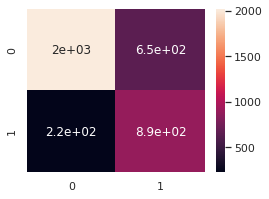

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


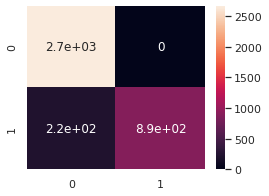

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.7690476190476191 (Prob of detection): 79.92831541218638 (Prob of false alarm): 24.36186186186186 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 649, 2015, 224)


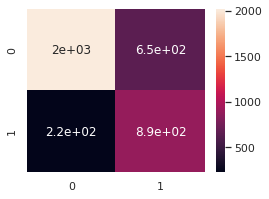

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.7690476190476191 (Prob of detection): 79.92831541218638 (Prob of false alarm): 24.36186186186186 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 649, 2015, 224)


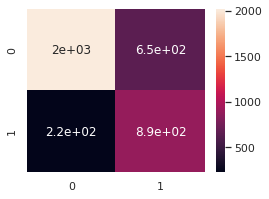

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.7690476190476191 (Prob of detection): 79.92831541218638 (Prob of false alarm): 24.36186186186186 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 649, 2015, 224)


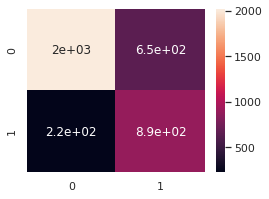

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.7690476190476191
0.5917989417989418
0.9407407407407408
0.9407407407407408
0.7690476190476191
0.9407407407407408
0.7690476190476191
0.7690476190476191
0.7690476190476191
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  2




79.92831541218638
100.0
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
Max Prob of Detection:  100.0
Index of Max Prob of Detection for 9 Models:  1




24.36186186186186
57.92042042042041
0.0
0.0
24.36186186186186
0.0
24.36186186186186
24.36186186186186
24.36186186186186
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  2




20.07168458781362
0.0
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
Min Prob of Misdetection:  0.0
Index of Min Prob of Misdetection for 9 Models:  1






## CH-3 Dataset

In [ ]:
# Ch3 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch3, y_ch3, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9353793240293671
OrderedDict([('C', 7.667927622940534), ('degree', 2), ('gamma', 0.003246312193620558)])

GaussianNB:

0.8398042198558106
OrderedDict([('var_smoothing', 0.001)])

DecisionTreeClassifier:

0.9353793240293671
OrderedDict([('criterion', 'gini'), ('max_depth', 1.0), ('max_features', 'log2'), ('splitter', 'best')])

KNeighborsClassifier:

0.935247040148158
OrderedDict([('n_neighbors', 1)])

LinearDiscriminantAnalysis:

0.9353793240293671
OrderedDict([('solver', 'svd')])

RandomForestClassifier:

0.9353793240293671
OrderedDict([('max_depth', 1), ('min_samples_split', 2), ('n_estimators', 10)])

MLPClassifier:

0.9353793240293671
OrderedDict([('activation', 'tanh'), ('alpha', 0.3410997468602891), ('solver', 'lbfgs')])

ElasticNet:

0.7595288158637405
OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.0001), ('selection', 'cyclic')])

LogisticRegression:

0.9353793240293671
OrderedDict([('C', 0.009899235953952468), ('l1_ratio', 0.50005), ('solver', 'newton-cg')])

      Ac

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


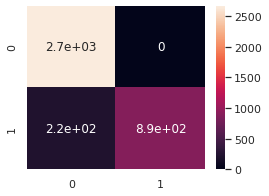

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.8420634920634921 (Prob of detection): 79.92831541218638 (Prob of false alarm): 14.001501501501501 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 373, 2291, 224)


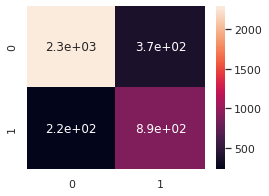

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9407407407407408 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


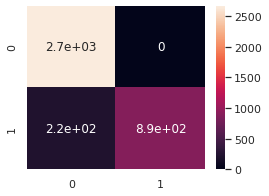

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


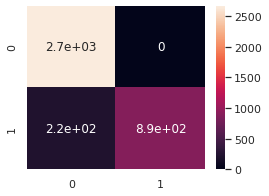

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


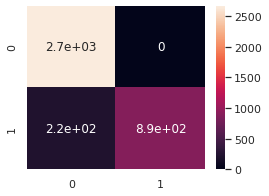

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


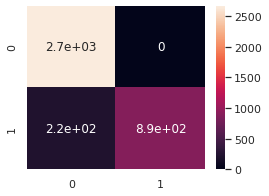

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


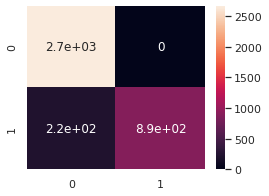

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


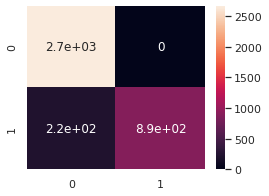

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


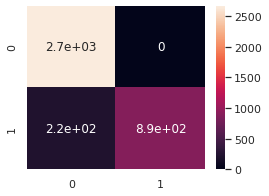

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.9407407407407408
0.8420634920634921
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
0.9407407407407408
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  0




79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  0




0.0
14.001501501501501
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  0




20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
Min Prob of Misdetection:  20.07168458781362
Index of Min Prob of Misdetection for 9 Models:  0






## CH-4 Dataset

In [ ]:
# Ch4 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch4, y_ch4, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.8767775646537469
OrderedDict([('C', 100.0), ('degree', 1), ('gamma', 100.0)])

GaussianNB:

0.7002447251802368
OrderedDict([('var_smoothing', 1e-06)])

DecisionTreeClassifier:

0.9353131820887625
OrderedDict([('criterion', 'gini'), ('max_depth', 32.0), ('max_features', 'auto'), ('splitter', 'random')])

KNeighborsClassifier:

0.9022422117864938
OrderedDict([('n_neighbors', 1)])

LinearDiscriminantAnalysis:

0.7608968847145975
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.935247040148158
OrderedDict([('max_depth', 127), ('min_samples_split', 2), ('n_estimators', 312)])

MLPClassifier:

0.7540181228917257
OrderedDict([('activation', 'identity'), ('alpha', 0.49983378321033056), ('solver', 'lbfgs')])

ElasticNet:

0.08447219784679375
OrderedDict([('alpha', 0.0006614113519407081), ('l1_ratio', 0.38083371869399396), ('selection', 'cyclic')])

LogisticRegression:

0.7524307163172167
OrderedDict([('C', 100.0), ('l1_ratio', 0.0001), ('solver', 'lbfgs')])

      Accuracy

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.8939153439153439 (Prob of detection): 65.86021505376344 (Prob of false alarm): 0.7507507507507507 (Prob of misdetection): 34.13978494623656
None
TP,FP,TN,FN:  (735, 20, 2644, 381)


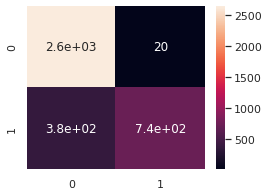

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.7082010582010582 (Prob of detection): 23.297491039426525 (Prob of false alarm): 9.271771771771773 (Prob of misdetection): 76.70250896057348
None
TP,FP,TN,FN:  (260, 247, 2417, 856)


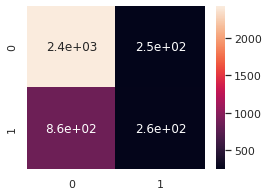

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9391534391534392 79.6594982078853 (Prob of false alarm): 0.11261261261261261 (Prob of misdetection): 20.340501792114697
None
TP,FP,TN,FN:  (889, 3, 2661, 227)


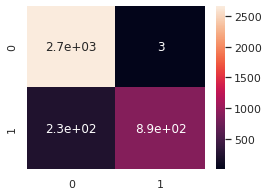

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9126984126984127 (Prob of detection): 75.7168458781362 (Prob of false alarm): 2.214714714714715 (Prob of misdetection): 24.2831541218638
None
TP,FP,TN,FN:  (845, 59, 2605, 271)


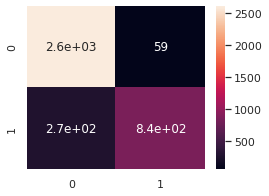

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.7711640211640212 (Prob of detection): 23.297491039426525 (Prob of false alarm): 0.33783783783783783 (Prob of misdetection): 76.70250896057348
None
TP,FP,TN,FN:  (260, 9, 2655, 856)


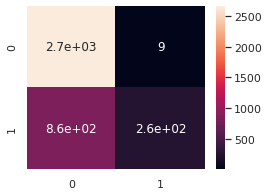

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


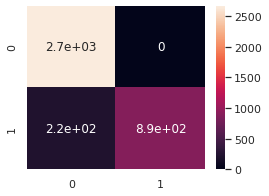

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.7661375661375661 (Prob of detection): 22.311827956989248 (Prob of false alarm): 0.6381381381381381 (Prob of misdetection): 77.68817204301075
None
TP,FP,TN,FN:  (249, 17, 2647, 867)


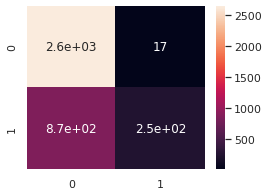

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.7357142857142858 (Prob of detection): 16.845878136200717 (Prob of false alarm): 2.665165165165165 (Prob of misdetection): 77.68817204301075
None
TP,FP,TN,FN:  (188, 71, 2593, 928)


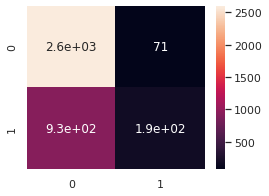

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.7658730158730159 (Prob of detection): 22.22222222222222 (Prob of false alarm): 0.6381381381381381 (Prob of misdetection): 77.68817204301075
None
TP,FP,TN,FN:  (248, 17, 2647, 868)


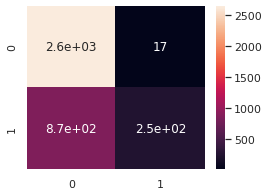

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.8939153439153439
0.7082010582010582
0.9391534391534392
0.9126984126984127
0.7711640211640212
0.9407407407407408
0.7661375661375661
0.7357142857142858
0.7658730158730159
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  5




65.86021505376344
23.297491039426525
79.6594982078853
75.7168458781362
23.297491039426525
79.92831541218638
22.311827956989248
16.845878136200717
22.22222222222222
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  5




0.7507507507507507
9.271771771771773
0.11261261261261261
2.214714714714715
0.33783783783783783
0.0
0.6381381381381381
2.665165165165165
0.6381381381381381
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  5




34.13978494623656
76.70250896057348
20.340501792114697
24.2831541218638
76.70250896057348
20.07168458781362
77.68817204301075
83.15412186379928
77.77777777777779
Min Prob of Misdetection:  20.07168458781362
Index of Min 

## CH-5 Dataset

In [ ]:
# Ch5 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch5, y_ch5, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9038957603016072
OrderedDict([('C', 20.861975371509278), ('degree', 3), ('gamma', 0.0002538393195107148)])

GaussianNB:

0.9038957603016072
OrderedDict([('var_smoothing', 1e-06)])

DecisionTreeClassifier:

0.9353793240293671
OrderedDict([('criterion', 'entropy'), ('max_depth', 8.75), ('max_features', 'auto'), ('splitter', 'random')])

KNeighborsClassifier:

0.9353793240293671
OrderedDict([('n_neighbors', 4)])

LinearDiscriminantAnalysis:

0.9038957603016072
OrderedDict([('solver', 'lsqr')])

RandomForestClassifier:

0.9353793240293671
OrderedDict([('max_depth', 111), ('min_samples_split', 7), ('n_estimators', 283)])

MLPClassifier:

0.9038957603016072
OrderedDict([('activation', 'logistic'), ('alpha', 0.45789899920646004), ('solver', 'adam')])

ElasticNet:

0.6200510401619453
OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.2010814030978674), ('selection', 'cyclic')])

LogisticRegression:

0.9038957603016072
OrderedDict([('C', 0.00014675523015193344), ('l1_ratio', 0.250075), ('s

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


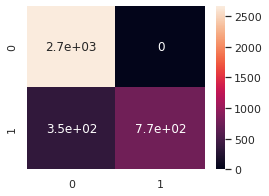

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


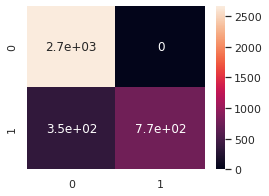

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9404761904761905 79.83870967741935 (Prob of false alarm): 0.0 (Prob of misdetection): 20.161290322580644
None
TP,FP,TN,FN:  (891, 0, 2664, 225)


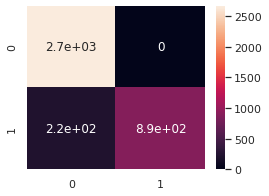

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


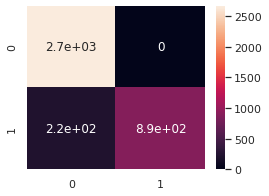

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


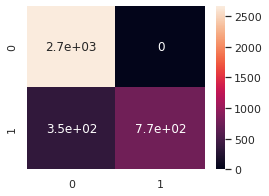

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


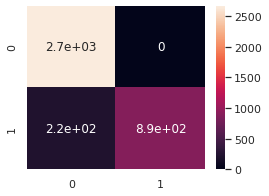

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


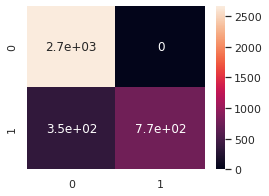

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


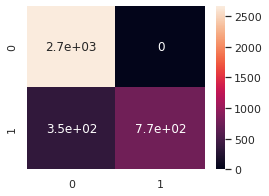

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.9079365079365079 (Prob of detection): 68.81720430107528 (Prob of false alarm): 0.0 (Prob of misdetection): 31.182795698924732
None
TP,FP,TN,FN:  (768, 0, 2664, 348)


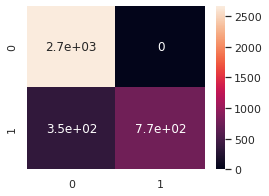

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.9079365079365079
0.9079365079365079
0.9404761904761905
0.9407407407407408
0.9079365079365079
0.9407407407407408
0.9079365079365079
0.9079365079365079
0.9079365079365079
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  3




68.81720430107528
68.81720430107528
79.83870967741935
79.92831541218638
68.81720430107528
79.92831541218638
68.81720430107528
68.81720430107528
68.81720430107528
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  3




0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  0




31.182795698924732
31.182795698924732
20.161290322580644
20.07168458781362
31.182795698924732
20.07168458781362
31.182795698924732
31.182795698924732
31.182795698924732
Min Prob of Misdetection:  20.07168458781362
Index of Min Prob of Misdetection for 9 Models:  3






## CH-6 Dataset

In [ ]:
# Ch6 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch6, y_ch6, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9278391428004498
OrderedDict([('C', 80.80190466770804), ('degree', 4), ('gamma', 95.79737396344444)])

GaussianNB:

0.5335008929161982
OrderedDict([('var_smoothing', 0.001)])

DecisionTreeClassifier:

0.9354454659699716
OrderedDict([('criterion', 'gini'), ('max_depth', 24.25), ('max_features', 'log2'), ('splitter', 'random')])

KNeighborsClassifier:

0.935247040148158
OrderedDict([('n_neighbors', 4)])

LinearDiscriminantAnalysis:

0.7220715655797341
OrderedDict([('solver', 'svd')])

RandomForestClassifier:

0.9351808982075535
OrderedDict([('max_depth', 2), ('min_samples_split', 7), ('n_estimators', 922)])

MLPClassifier:

0.7220715655797341
OrderedDict([('activation', 'relu'), ('alpha', 0.44224098503073495), ('solver', 'lbfgs')])

ElasticNet:

0.2356320537011856
OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.0001), ('selection', 'random')])

LogisticRegression:

0.7220715655797341
OrderedDict([('C', 1.1064876775386), ('l1_ratio', 0.250075), ('solver', 'newton-cg')])

      Acc

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.8759259259259259 (Prob of detection): 79.92831541218638 (Prob of false alarm): 9.196696696696696 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 245, 2419, 224)


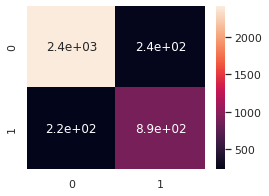

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.5208994708994709 (Prob of detection): 100.0 (Prob of false alarm): 67.98048048048048 (Prob of misdetection): 0.0
None
TP,FP,TN,FN:  (1116, 1811, 853, 0)


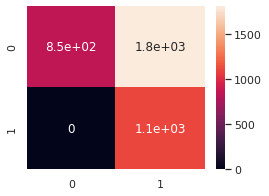

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9407407407407408 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


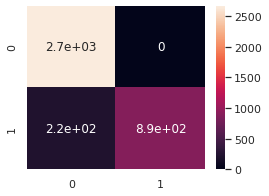

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


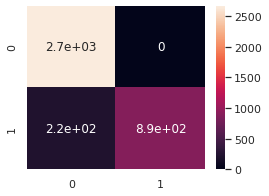

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.7346560846560847 (Prob of detection): 10.125448028673835 (Prob of false alarm): 0.0 (Prob of misdetection): 89.87455197132617
None
TP,FP,TN,FN:  (113, 0, 2664, 1003)


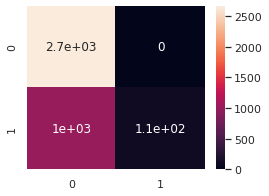

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.937037037037037 (Prob of detection): 78.67383512544804 (Prob of false alarm): 0.0 (Prob of misdetection): 21.32616487455197
None
TP,FP,TN,FN:  (878, 0, 2664, 238)


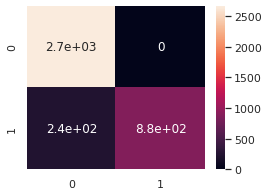

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.7346560846560847 (Prob of detection): 10.125448028673835 (Prob of false alarm): 0.0 (Prob of misdetection): 89.87455197132617
None
TP,FP,TN,FN:  (113, 0, 2664, 1003)


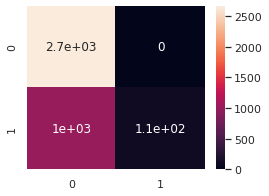

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.7346560846560847 (Prob of detection): 10.125448028673835 (Prob of false alarm): 0.0 (Prob of misdetection): 89.87455197132617
None
TP,FP,TN,FN:  (113, 0, 2664, 1003)


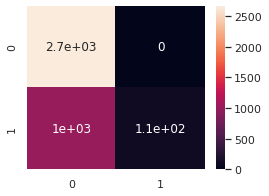

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.7346560846560847 (Prob of detection): 10.125448028673835 (Prob of false alarm): 0.0 (Prob of misdetection): 89.87455197132617
None
TP,FP,TN,FN:  (113, 0, 2664, 1003)


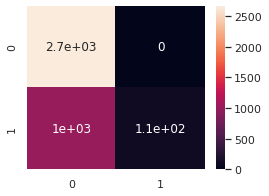

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.8759259259259259
0.5208994708994709
0.9407407407407408
0.9407407407407408
0.7346560846560847
0.937037037037037
0.7346560846560847
0.7346560846560847
0.7346560846560847
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  2




79.92831541218638
100.0
79.92831541218638
79.92831541218638
10.125448028673835
78.67383512544804
10.125448028673835
10.125448028673835
10.125448028673835
Max Prob of Detection:  100.0
Index of Max Prob of Detection for 9 Models:  1




9.196696696696696
67.98048048048048
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  2




20.07168458781362
0.0
20.07168458781362
20.07168458781362
89.87455197132617
21.32616487455197
89.87455197132617
89.87455197132617
89.87455197132617
Min Prob of Misdetection:  0.0
Index of Min Prob of Misdetection for 9 Models:  1






## CH-7 Dataset

In [ ]:
# Ch7 Dataset
X_train, X_test, y_train, y_test = train_test_split(X_ch7, y_ch7, test_size=0.2, random_state=42, shuffle = True)

#################################################

# SVC
cv = 2
params_svc = dict()
params_svc['C'] = (1e-6, 100.0, 'log-uniform')
params_svc['gamma'] = (1e-6, 100.0, 'log-uniform')
params_svc['degree'] = (1,5)
bayesian_search = BayesSearchCV(estimator=SVC(), search_spaces=params_svc, n_jobs=-1, cv=cv)
bayesian_search.fit(X_train, y_train)
print("\nSVC:\n")
print(bayesian_search.best_score_)
print(bayesian_search.best_params_)
model_svc = SVC(C=bayesian_search.best_params_['C'],
                degree= bayesian_search.best_params_['degree'],
                gamma= bayesian_search.best_params_['gamma']).fit(X_train, y_train)

#################################################

# GaussianNB
params_bayes = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
}
bayesian_search_bayes = BayesSearchCV(estimator=GaussianNB(), search_spaces=params_bayes, n_jobs=-1, cv=cv)
bayesian_search_bayes.fit(X_train, y_train)
print("\nGaussianNB:\n")
print(bayesian_search_bayes.best_score_)
print(bayesian_search_bayes.best_params_)
model_bayes = GaussianNB(var_smoothing=bayesian_search_bayes.best_params_['var_smoothing']).fit(X_train, y_train)

#################################################

# DecisionTreeClassifier
params_decisiontree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.linspace(1, 32, 5, endpoint=True)
}
bayesian_search_decisiontree = BayesSearchCV(estimator=DecisionTreeClassifier(), search_spaces=params_decisiontree, n_jobs=-1, cv=cv)
bayesian_search_decisiontree.fit(X_train, y_train)
print("\nDecisionTreeClassifier:\n")
print(bayesian_search_decisiontree.best_score_)
print(bayesian_search_decisiontree.best_params_)
model_tree = DecisionTreeClassifier(criterion=bayesian_search_decisiontree.best_params_['criterion'],
                                    splitter= bayesian_search_decisiontree.best_params_['splitter'],
                                    max_features= bayesian_search_decisiontree.best_params_['max_features'],
                                    max_depth= bayesian_search_decisiontree.best_params_['max_depth']).fit(X_train, y_train)

#################################################

# KNeighborsClassifier
params_knn = {
    'n_neighbors': np.linspace(1, 5, 2, endpoint=True, dtype='int')
}
bayesian_search_knn = BayesSearchCV(estimator=KNeighborsClassifier(), search_spaces=params_knn, n_jobs=-1, cv=cv)
bayesian_search_knn.fit(X_train, y_train)
print("\nKNeighborsClassifier:\n")
print(bayesian_search_knn.best_score_)
print(bayesian_search_knn.best_params_)
model_knn = KNeighborsClassifier(n_neighbors=bayesian_search_knn.best_params_['n_neighbors']).fit(X_train, y_train)

#################################################

# LinearDiscriminantAnalysis
params_lda = {
    'solver': ['svd','lsqr'],
}
bayesian_search_lda = BayesSearchCV(estimator=LinearDiscriminantAnalysis(), search_spaces=params_lda, n_jobs=-1, cv=cv)
bayesian_search_lda.fit(X_train, y_train)
print("\nLinearDiscriminantAnalysis:\n")
print(bayesian_search_lda.best_score_)
print(bayesian_search_lda.best_params_)
model_LDA = LinearDiscriminantAnalysis(solver=bayesian_search_lda.best_params_['solver']).fit(X_train, y_train)

#################################################

# RandomForestClassifier
params_rfc = {
    "n_estimators": np.linspace(10, 1000,num=2,dtype=int),
    "max_depth": np.linspace(1, 150,num=2,dtype=int),
    "min_samples_split": np.linspace(2, 10,num=2,dtype=int)
    }
bayesian_search_rfc = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params_rfc, n_jobs=-1, cv=cv)
bayesian_search_rfc.fit(X_train, y_train)
print("\nRandomForestClassifier:\n")
print(bayesian_search_rfc.best_score_)
print(bayesian_search_rfc.best_params_)
model_randomforest= RandomForestClassifier(max_depth=bayesian_search_rfc.best_params_['max_depth'],
                                           min_samples_split= bayesian_search_rfc.best_params_['min_samples_split'], 
                                           n_estimators= bayesian_search_rfc.best_params_['n_estimators']).fit(X_train, y_train)

#################################################

# MLPClassifier
params_neuralnet = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'adam'],
    "alpha": np.linspace(0.0001, 0.5,num=2),
    }
bayesian_search_neuralnet = BayesSearchCV(estimator=MLPClassifier(), search_spaces=params_neuralnet, n_jobs=-1, cv=cv)
bayesian_search_neuralnet.fit(X_train, y_train)
print("\nMLPClassifier:\n")
print(bayesian_search_neuralnet.best_score_)
print(bayesian_search_neuralnet.best_params_)
model_neuralNetwork= MLPClassifier(activation=bayesian_search_neuralnet.best_params_['activation'],
                                   alpha=bayesian_search_neuralnet.best_params_['alpha'],
                                   solver=bayesian_search_neuralnet.best_params_['solver'], max_iter=1000).fit(X_train, y_train)

#################################################

# ElasticNet
params_elastNet = {
    "l1_ratio": np.linspace(0.0001, 1,num=2),
    "alpha": np.linspace(0.0001, 2,num=2),
    "selection": ["random", "cyclic"]
    }
bayesian_search_elastNet = BayesSearchCV(estimator=ElasticNet(), search_spaces=params_elastNet, n_jobs=-1, cv=cv)
bayesian_search_elastNet.fit(X_train, y_train)
print("\nElasticNet:\n")
print(bayesian_search_elastNet.best_score_)
print(bayesian_search_elastNet.best_params_)
model_elastNet = ElasticNet(alpha=bayesian_search_elastNet.best_params_['alpha'],
                            l1_ratio=bayesian_search_elastNet.best_params_['l1_ratio'],
                            selection=bayesian_search_elastNet.best_params_['selection']).fit(X_train,y_train)

#################################################

# LogisticRegression
params_logistReg = {
    "l1_ratio": np.linspace(0.0001, 1,num=5),
    "C" : (1e-6, 100.0, 'log-uniform'),
    "solver": ['newton-cg', 'sag', 'lbfgs']
    }
bayesian_search_logistReg = BayesSearchCV(estimator=LogisticRegression(), search_spaces=params_logistReg, n_jobs=-1, cv=cv)
bayesian_search_logistReg.fit(X_train, y_train)
print("\nLogisticRegression:\n")
print(bayesian_search_logistReg.best_score_)
print(bayesian_search_logistReg.best_params_)
model_logReg = LogisticRegression(C= bayesian_search_logistReg.best_params_['C'],
                                  l1_ratio=bayesian_search_logistReg.best_params_['l1_ratio'],
                                  solver= bayesian_search_logistReg.best_params_['solver']).fit(X_train,y_train)


# Predictions

svc_pred = model_svc.predict(X_test)
bayes_pred = model_bayes.predict(X_test)
tree_pred = model_tree.predict(X_test)
knn_pred = model_knn.predict(X_test)
LDA_pred = model_LDA.predict(X_test)
rf_pred = model_randomforest.predict(X_test)
nn_pred = model_neuralNetwork.predict(X_test)
en_pred = np.round(model_elastNet.predict(X_test))
lr_pred = model_logReg.predict(X_test)

# Accuracy
svc_acc = accuracy_score(y_test,svc_pred)
bayes_acc = accuracy_score(y_test,bayes_pred)
tree_acc = accuracy_score(y_test,tree_pred)
knn_acc = accuracy_score(y_test,knn_pred)
LDA_acc = accuracy_score(y_test,LDA_pred)
rf_acc = accuracy_score(y_test,rf_pred)
nn_acc = accuracy_score(y_test,nn_pred)
en_acc = accuracy_score(y_test,en_pred)
lr_acc = accuracy_score(y_test,lr_pred)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test,svc_pred)
bayes_conf_matrix = confusion_matrix(y_test,bayes_pred)
tree_conf_matrix = confusion_matrix(y_test,tree_pred)
knn_conf_matrix = confusion_matrix(y_test,knn_pred)
LDA_conf_matrix = confusion_matrix(y_test,LDA_pred)
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
nn_conf_matrix = confusion_matrix(y_test,nn_pred)
en_conf_matrix = confusion_matrix(y_test,en_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_pred)

# Print Results
print("\n====================================")
print("      Accuracy on Main Dataset")
print("====================================\n")
print("SVC:                        ", round(svc_acc*100,2), "%")
print("GaussianNB:                 ", round(bayes_acc*100,2), "%")
print("DecisionTreeClassifier:     ", round(tree_acc*100,2), "%")
print("KNeighborsClassifier:       ", round(knn_acc*100,2), "%")
print("LinearDiscriminantAnalysis: ", round(LDA_acc*100,2), "%")
print("RandomForestClassifier:     ", round(rf_acc*100,2), "%")
print("MLPClassifier:              ", round(nn_acc*100,2), "%")
print("ElasticNet:                 ", round(en_acc*100,2), "%")
print("LogisticRegression:         ", round(lr_acc*100,2), "%")
print("\n====================================\n")


SVC:

0.9332627819300219
OrderedDict([('C', 100.0), ('degree', 1), ('gamma', 0.052822096363599254)])

GaussianNB:

0.871618493286593
OrderedDict([('var_smoothing', 0.001)])

DecisionTreeClassifier:

0.9353131820887625
OrderedDict([('criterion', 'gini'), ('max_depth', 8.75), ('max_features', 'log2'), ('splitter', 'best')])

KNeighborsClassifier:

0.9237383424829685
OrderedDict([('n_neighbors', 1)])

LinearDiscriminantAnalysis:

0.9257887426417091
OrderedDict([('solver', 'svd')])

RandomForestClassifier:

0.935247040148158
OrderedDict([('max_depth', 150), ('min_samples_split', 10), ('n_estimators', 10)])

MLPClassifier:

0.935247040148158
OrderedDict([('activation', 'relu'), ('alpha', 0.09154138340071995), ('solver', 'lbfgs')])

ElasticNet:

0.6221029084595122
OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.0001), ('selection', 'random')])

LogisticRegression:

0.935247040148158
OrderedDict([('C', 100.0), ('l1_ratio', 0.0001), ('solver', 'lbfgs')])

      Accuracy on Main Dataset

SVC:  

In [ ]:
# Evaluation

svc_detect ,svc_false, svc_misdetect = calculate(perf_measure(y_test,svc_pred))        
bayes_detect,bayes_false, bayes_misdetect = calculate(perf_measure(y_test,bayes_pred)) 
tree_detect,tree_false, tree_misdetect = calculate(perf_measure(y_test,tree_pred))    
knn_detect, knn_false, knn_misdetect = calculate(perf_measure(y_test,knn_pred))        
LDA_detect, LDA_false, LDA_misdetect = calculate(perf_measure(y_test,LDA_pred))        
rf_detect, rf_false, rf_misdetect = calculate(perf_measure(y_test,rf_pred))            
nn_detect, nn_false, nn_misdetect = calculate(perf_measure(y_test,nn_pred))       
en_detect, en_false, en_misdetect = calculate(perf_measure(y_test,en_pred))       
lr_detect, lr_false, lr_misdetect = calculate(perf_measure(y_test,lr_pred)) 

SVC with Bayesian Optimization:
 Acc: 0.9391534391534392 (Prob of detection): 79.74910394265234 (Prob of false alarm): 0.15015015015015015 (Prob of misdetection): 20.25089605734767
None
TP,FP,TN,FN:  (890, 4, 2660, 226)


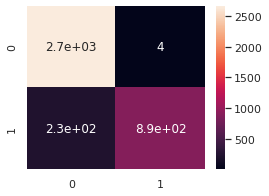

In [ ]:
print("SVC with Bayesian Optimization:\n","Acc:",svc_acc, "(Prob of detection):", svc_detect , "(Prob of false alarm):", svc_false, "(Prob of misdetection):", svc_misdetect)
print(plot_cf(svc_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,svc_pred))


GaussianNB with Bayesian Optimization:
 Acc: 0.8751322751322751 (Prob of detection): 79.92831541218638 (Prob of false alarm): 9.30930930930931 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 248, 2416, 224)


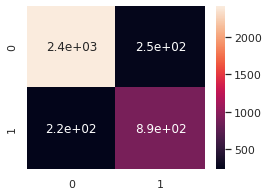

In [ ]:
print("\nGaussianNB with Bayesian Optimization:\n","Acc:",bayes_acc, "(Prob of detection):",  bayes_detect, "(Prob of false alarm):",bayes_false, "(Prob of misdetection):", bayes_misdetect)
print(plot_cf(bayes_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,bayes_pred))


DecisionTreeClassifier with Bayesian Optimization:
 Acc: (Prob of detection): 0.9407407407407408 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


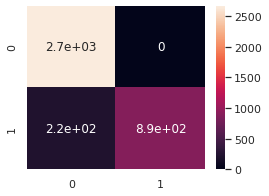

In [ ]:
print("\nDecisionTreeClassifier with Bayesian Optimization:\n","Acc:", "(Prob of detection):", tree_acc, tree_detect, "(Prob of false alarm):",tree_false, "(Prob of misdetection):", tree_misdetect)
print(plot_cf(tree_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,tree_pred))


KNeighborsClassifier with Bayesian Optimization:
 Acc: 0.926984126984127 (Prob of detection): 77.5089605734767 (Prob of false alarm): 0.9384384384384384 (Prob of misdetection): 22.491039426523297
None
TP,FP,TN,FN:  (865, 25, 2639, 251)


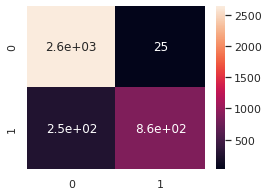

In [ ]:
print("\nKNeighborsClassifier with Bayesian Optimization:\n","Acc:",knn_acc, "(Prob of detection):",  knn_detect, "(Prob of false alarm):", knn_false, "(Prob of misdetection):", knn_misdetect)
print(plot_cf(knn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,knn_pred))


LinearDiscriminantAnalysis with Bayesian Optimization:
 Acc: 0.9312169312169312 (Prob of detection): 79.83870967741935 (Prob of false alarm): 1.3138138138138138 (Prob of misdetection): 20.161290322580644
None
TP,FP,TN,FN:  (891, 35, 2629, 225)


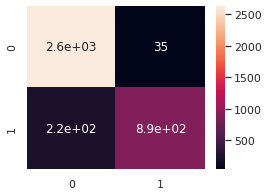

In [ ]:
print("\nLinearDiscriminantAnalysis with Bayesian Optimization:\n","Acc:",LDA_acc, "(Prob of detection):", LDA_detect, "(Prob of false alarm):", LDA_false, "(Prob of misdetection):", LDA_misdetect)
print(plot_cf(LDA_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,LDA_pred))


RandomForestClassifier with Bayesian Optimization:
 Acc: 0.9407407407407408 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.0 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 0, 2664, 224)


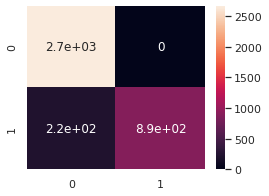

In [ ]:
print("\nRandomForestClassifier with Bayesian Optimization:\n","Acc:",rf_acc, "(Prob of detection):",  rf_detect, "(Prob of false alarm):", rf_false, "(Prob of misdetection):", rf_misdetect)
print(plot_cf(rf_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,rf_pred))


MLPClassifier with Bayesian Optimization:
 Acc: 0.9404761904761905 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.03753753753753754 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 1, 2663, 224)


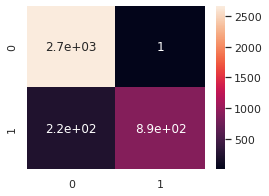

In [ ]:
print("\nMLPClassifier with Bayesian Optimization:\n","Acc:",nn_acc, "(Prob of detection):", nn_detect, "(Prob of false alarm):", nn_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(nn_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,nn_pred))


ElasticNet with Bayesian Optimization:
 Acc: 0.9203703703703704 (Prob of detection): 79.92831541218638 (Prob of false alarm): 2.8903903903903903 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 77, 2587, 224)


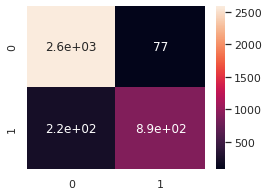

In [ ]:
print("\nElasticNet with Bayesian Optimization:\n","Acc:",en_acc, "(Prob of detection):", en_detect, "(Prob of false alarm):", en_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(en_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,en_pred))


LogisticRegression with Bayesian Optimization:
 Acc: 0.9404761904761905 (Prob of detection): 79.92831541218638 (Prob of false alarm): 0.03753753753753754 (Prob of misdetection): 20.07168458781362
None
TP,FP,TN,FN:  (892, 1, 2663, 224)


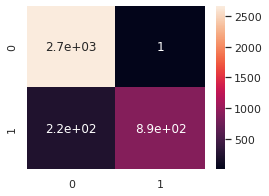

In [ ]:
print("\nLogisticRegression with Bayesian Optimization:\n","Acc:",lr_acc, "(Prob of detection):", lr_detect, "(Prob of false alarm):", lr_false, "(Prob of misdetection):", nn_misdetect)
print(plot_cf(lr_conf_matrix))
print("TP,FP,TN,FN: ",perf_measure(y_test,lr_pred))

In [ ]:
print("The Best Dynamic Classifiers:")
print("\n\n============================================\n\n")
#https://medium.com/@ramcesc/machine-learning-algorithm-comparison-python-81ad097d373c

acc1= array.array('d', [svc_acc,bayes_acc,tree_acc,knn_acc,LDA_acc,rf_acc,nn_acc,en_acc,lr_acc])
for i in acc1:
    print (i)
print ("Max  Accuracy: ",max(acc1))
max_acc=max(acc1)
max_index_acc = acc1. index(max_acc)
print ("Index of Max Accuracy for 9 Models: ", max_index_acc )
print("\n\n============================================\n\n")

detect1=array.array('d', [svc_detect,bayes_detect,tree_detect,knn_detect,LDA_detect,rf_detect,nn_detect,en_detect,lr_detect])
for i in detect1:
    print (i)
print ("Max Prob of Detection: ",max(detect1))
max_detect=max(detect1)
max_index_detect = detect1. index(max_detect)
print ("Index of Max Prob of Detection for 9 Models: ",max_index_detect )
print("\n\n============================================\n\n")

false1=array.array('d', [svc_false,bayes_false,tree_false,knn_false,LDA_false,rf_false,nn_false,en_false,lr_false])
for i in false1:
    print (i)
print ("Min Prob of False Alarm: ",min(false1))
min_false=min(false1)
min_index_false = false1. index(min_false)
print ("Index of Min Prob of False Alarm for 9 Models: ", min_index_false)
print("\n\n============================================\n\n")

misdetect1=array.array('d', [svc_misdetect,bayes_misdetect,tree_misdetect,knn_misdetect,LDA_misdetect,rf_misdetect,nn_misdetect,en_misdetect,lr_misdetect])
for i in misdetect1:
    print (i)
print ("Min Prob of Misdetection: ",min(misdetect1))
min_misdetect=min(misdetect1)
min_index_misdetect = misdetect1. index(min_misdetect)
print ("Index of Min Prob of Misdetection for 9 Models: ", min_index_misdetect)
print("\n\n============================================\n\n")

The Best Dynamic Classifiers:




0.9391534391534392
0.8751322751322751
0.9407407407407408
0.926984126984127
0.9312169312169312
0.9407407407407408
0.9404761904761905
0.9203703703703704
0.9404761904761905
Max  Accuracy:  0.9407407407407408
Index of Max Accuracy for 9 Models:  2




79.74910394265234
79.92831541218638
79.92831541218638
77.5089605734767
79.83870967741935
79.92831541218638
79.92831541218638
79.92831541218638
79.92831541218638
Max Prob of Detection:  79.92831541218638
Index of Max Prob of Detection for 9 Models:  1




0.15015015015015015
9.30930930930931
0.0
0.9384384384384384
1.3138138138138138
0.0
0.03753753753753754
2.8903903903903903
0.03753753753753754
Min Prob of False Alarm:  0.0
Index of Min Prob of False Alarm for 9 Models:  2




20.25089605734767
20.07168458781362
20.07168458781362
22.491039426523297
20.161290322580644
20.07168458781362
20.07168458781362
20.07168458781362
20.07168458781362
Min Prob of Misdetection:  20.07168458781362
Index of Min Prob of Misdete

<center>
    <br>
        <br>
            <br>
                <h5 style = "color:blue">====================================================================</h5>
                <h2 style = "color:green">Thank you so much</h2>
                <h5 style = "color:blue">====================================================================</h5>
            <br>
        <br>
    <br>
</center>